<a href="https://colab.research.google.com/github/juanpablohdz/CANCER_DE_MAMA/blob/main/prueba_red_neuronal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Para poder realizar pruebas es fundamental crear una copia del archivo original antes de redimensionarlo, ya que al reducir una imagen a una resolución menor y posteriormente intentar aumentarla, se pierde información y calidad, lo que puede afectar negativamente los resultados del análisis y el entrenamiento del modelo.

In [ ]:
import pandas as pd
from PIL import Image
from pathlib import Path

# ==============================
# CONFIGURACIÓN
# ==============================
CSV_FILES = [
    r"C:\Users\juanh\Desktop\carpeta_final_cancer_de_mama\PROYECTO_COPIA_IMAGENES_REDIMENCION_ANTES_SIN_USO_prueba_1024\calc_case_description_test_set.csv",
    r"C:\Users\juanh\Desktop\carpeta_final_cancer_de_mama\PROYECTO_COPIA_IMAGENES_REDIMENCION_ANTES_SIN_USO_prueba_1024\calc_case_description_train_set.csv",
    r"C:\Users\juanh\Desktop\carpeta_final_cancer_de_mama\PROYECTO_COPIA_IMAGENES_REDIMENCION_ANTES_SIN_USO_prueba_1024\mass_case_description_test_set.csv",
    r"C:\Users\juanh\Desktop\carpeta_final_cancer_de_mama\PROYECTO_COPIA_IMAGENES_REDIMENCION_ANTES_SIN_USO_prueba_1024\mass_case_description_train_set.csv",
]

COL_IMAGE = "image file path"
TARGET_SIZE = (1024, 1024)
#TARGET_SIZE = (512, 512) # redimencionamiento de la imagen paremtro
# ==============================
# PROCESO
# ==============================
total_imagenes = 0
redimensionadas = 0
no_encontradas = 0

for csv_path in CSV_FILES:
    df = pd.read_csv(csv_path)

    print(f"\nProcesando: {csv_path}")
    print(f"Filas: {len(df)}")

    for ruta_img in df[COL_IMAGE].dropna():
        total_imagenes += 1
        img_path = Path(ruta_img)

        if not img_path.exists():
            no_encontradas += 1
            continue

        try:
            with Image.open(img_path) as img:
                # Convertir a escala de grises (mamografía)
                img = img.convert("L")

                # Redimensionar
                img_resized = img.resize(TARGET_SIZE, Image.BILINEAR)

                # Sobrescribir imagen
                img_resized.save(img_path)

                redimensionadas += 1

        except Exception as e:
            print(f"[ERROR] {img_path}: {e}")

# ==============================
# RESUMEN
# ==============================
print("\n==============================")
print("RESUMEN FINAL")
print("==============================")
print(f"Total rutas procesadas : {total_imagenes}")
print(f"Imágenes redimensionadas : {redimensionadas}")
print(f"Rutas no encontradas : {no_encontradas}")
print("✔ Proceso finalizado")



Procesando: C:\Users\juanh\Desktop\carpeta_final_cancer_de_mama\PROYECTO_COPIA_IMAGENES_REDIMENCION_ANTES_SIN_USO_prueba_1024\calc_case_description_test_set.csv
Filas: 326

Procesando: C:\Users\juanh\Desktop\carpeta_final_cancer_de_mama\PROYECTO_COPIA_IMAGENES_REDIMENCION_ANTES_SIN_USO_prueba_1024\calc_case_description_train_set.csv
Filas: 1546

Procesando: C:\Users\juanh\Desktop\carpeta_final_cancer_de_mama\PROYECTO_COPIA_IMAGENES_REDIMENCION_ANTES_SIN_USO_prueba_1024\mass_case_description_test_set.csv
Filas: 378

Procesando: C:\Users\juanh\Desktop\carpeta_final_cancer_de_mama\PROYECTO_COPIA_IMAGENES_REDIMENCION_ANTES_SIN_USO_prueba_1024\mass_case_description_train_set.csv
Filas: 1318

RESUMEN FINAL
Total rutas procesadas : 3568
Imágenes redimensionadas : 3568
Rutas no encontradas : 0
✔ Proceso finalizado


In [ ]:
#las imagenes redimencionadas procederemos a limpiar los archivos para crear una red neuronal simple con paremetros cencillos
import pandas as pd

# ==============================
# CONFIGURACIÓN
# ==============================
CSV_FILES = [
    r"C:\Users\juanh\Desktop\carpeta_final_cancer_de_mama\PROYECTO_COPIA_IMAGENES_REDIMENCION_ANTES_SIN_USO_prueba_1024\calc_case_description_test_set.csv",
    r"C:\Users\juanh\Desktop\carpeta_final_cancer_de_mama\PROYECTO_COPIA_IMAGENES_REDIMENCION_ANTES_SIN_USO_prueba_1024\calc_case_description_train_set.csv",
    r"C:\Users\juanh\Desktop\carpeta_final_cancer_de_mama\PROYECTO_COPIA_IMAGENES_REDIMENCION_ANTES_SIN_USO_prueba_1024\mass_case_description_test_set.csv",
    r"C:\Users\juanh\Desktop\carpeta_final_cancer_de_mama\PROYECTO_COPIA_IMAGENES_REDIMENCION_ANTES_SIN_USO_prueba_1024\mass_case_description_train_set.csv",
]

COL_PATHOLOGY = "pathology"
COL_LABEL = "Label"

LABEL_MAP = {
    "BENIGN": 1,
    "BENIGN_WITHOUT_CALLBACK": 2,
    "MALIGNANT": 3
}

# ==============================
# PROCESO
# ==============================
for csv_path in CSV_FILES:
    df = pd.read_csv(csv_path)

    print(f"\nProcesando: {csv_path}")
    print(f"Filas: {len(df)}")

    # Verificar si ya existe la columna
    if COL_LABEL in df.columns:
        print("⚠ La columna 'Label' ya existe. Se omite.")
        continue

    # Crear columna Label
    df[COL_LABEL] = df[COL_PATHOLOGY].map(LABEL_MAP)

    # Validación básica
    n_nan = df[COL_LABEL].isna().sum()
    if n_nan > 0:
        print(f"⚠ Advertencia: {n_nan} filas sin etiqueta asignada")

    # Guardar cambios
    df.to_csv(csv_path, index=False)

    print("✔ Columna 'Label' creada correctamente")

print("\nProceso completado en los 4 archivos.")



Procesando: C:\Users\juanh\Desktop\carpeta_final_cancer_de_mama\PROYECTO_COPIA_IMAGENES_REDIMENCION_ANTES_SIN_USO_prueba_1024\calc_case_description_test_set.csv
Filas: 326
⚠ La columna 'Label' ya existe. Se omite.

Procesando: C:\Users\juanh\Desktop\carpeta_final_cancer_de_mama\PROYECTO_COPIA_IMAGENES_REDIMENCION_ANTES_SIN_USO_prueba_1024\calc_case_description_train_set.csv
Filas: 1546
⚠ La columna 'Label' ya existe. Se omite.

Procesando: C:\Users\juanh\Desktop\carpeta_final_cancer_de_mama\PROYECTO_COPIA_IMAGENES_REDIMENCION_ANTES_SIN_USO_prueba_1024\mass_case_description_test_set.csv
Filas: 378
⚠ La columna 'Label' ya existe. Se omite.

Procesando: C:\Users\juanh\Desktop\carpeta_final_cancer_de_mama\PROYECTO_COPIA_IMAGENES_REDIMENCION_ANTES_SIN_USO_prueba_1024\mass_case_description_train_set.csv
Filas: 1318
⚠ La columna 'Label' ya existe. Se omite.

Proceso completado en los 4 archivos.


In [ ]:
pd.read_csv(CSV_FILES[0])[["pathology", "Label"]].value_counts()


pathology                Label
BENIGN                   1        130
MALIGNANT                3        129
BENIGN_WITHOUT_CALLBACK  2         67
Name: count, dtype: int64

In [ ]:
##se eliminann columnas para poder entrenar el modelo
##se realizo respaldo

import pandas as pd

# ==============================
# CONFIGURACIÓN
# ==============================
CSV_FILES = [
    r"C:\Users\juanh\Desktop\carpeta_final_cancer_de_mama\PROYECTO_COPIA_IMAGENES_REDIMENCION_ANTES_SIN_USO_prueba_1024\calc_case_description_test_set.csv",
    r"C:\Users\juanh\Desktop\carpeta_final_cancer_de_mama\PROYECTO_COPIA_IMAGENES_REDIMENCION_ANTES_SIN_USO_prueba_1024\calc_case_description_train_set.csv",
    r"C:\Users\juanh\Desktop\carpeta_final_cancer_de_mama\PROYECTO_COPIA_IMAGENES_REDIMENCION_ANTES_SIN_USO_prueba_1024\mass_case_description_test_set.csv",
    r"C:\Users\juanh\Desktop\carpeta_final_cancer_de_mama\PROYECTO_COPIA_IMAGENES_REDIMENCION_ANTES_SIN_USO_prueba_1024\mass_case_description_train_set.csv",
]

COLUMNAS_A_CONSERVAR = [
    "image file path",
    "Label",
    "pathology"
]

# ==============================
# PROCESO
# ==============================
for csv_path in CSV_FILES:
    df = pd.read_csv(csv_path)

    print(f"\nProcesando: {csv_path}")
    print(f"Filas antes: {len(df)}")

    # Verificar columnas faltantes
    faltantes = [c for c in COLUMNAS_A_CONSERVAR if c not in df.columns]
    if faltantes:
        raise ValueError(f"❌ Columnas faltantes en {csv_path}: {faltantes}")

    # Filtrar columnas
    df = df[COLUMNAS_A_CONSERVAR]

    # Guardar
    df.to_csv(csv_path, index=False)

    print(f"✔ Columnas finales: {list(df.columns)}")
    print(f"✔ Filas después: {len(df)}")

print("\nProceso completado correctamente en los 4 archivos.")





Procesando: C:\Users\juanh\Desktop\carpeta_final_cancer_de_mama\PROYECTO_COPIA_IMAGENES_REDIMENCION_ANTES_SIN_USO_prueba_1024\calc_case_description_test_set.csv
Filas antes: 326
✔ Columnas finales: ['image file path', 'Label', 'pathology']
✔ Filas después: 326

Procesando: C:\Users\juanh\Desktop\carpeta_final_cancer_de_mama\PROYECTO_COPIA_IMAGENES_REDIMENCION_ANTES_SIN_USO_prueba_1024\calc_case_description_train_set.csv
Filas antes: 1546
✔ Columnas finales: ['image file path', 'Label', 'pathology']
✔ Filas después: 1546

Procesando: C:\Users\juanh\Desktop\carpeta_final_cancer_de_mama\PROYECTO_COPIA_IMAGENES_REDIMENCION_ANTES_SIN_USO_prueba_1024\mass_case_description_test_set.csv
Filas antes: 378
✔ Columnas finales: ['image file path', 'Label', 'pathology']
✔ Filas después: 378

Procesando: C:\Users\juanh\Desktop\carpeta_final_cancer_de_mama\PROYECTO_COPIA_IMAGENES_REDIMENCION_ANTES_SIN_USO_prueba_1024\mass_case_description_train_set.csv
Filas antes: 1318
✔ Columnas finales: ['image fi

# se procede a realizar el entrenamiento de redes neuronales
 PRUEBA GENERICA PARA VISUALIZAR EL CORRECTO ENTRANIMIENTO DE LAS IMAGENES  Y GENERE RESULTADOS

In [ ]:
import tensorflow as tf
print("TensorFlow GPU detectada:", tf.config.list_physical_devices('GPU'))
print(tf.test.is_gpu_available())

TensorFlow GPU detectada: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
True


In [ ]:
## import pandas as pd EN DADO CASO   QUE SE REQUIERA NUEVA REDIMENCIONAMIENTO SE EMPIEZA DESDE AQUI
from PIL import Image
from pathlib import Path

# ==============================
# CONFIGURACIÓN
# ==============================
CSV_FILES = [
    r"C:\Users\juanh\Desktop\carpeta_final_cancer_de_mama\PROYECTO_COPIA_IMAGENES_REDIMENCION_ANTES_SIN_USO_prueba_1024\calc_case_description_test_set.csv",
    r"C:\Users\juanh\Desktop\carpeta_final_cancer_de_mama\PROYECTO_COPIA_IMAGENES_REDIMENCION_ANTES_SIN_USO_prueba_1024\calc_case_description_train_set.csv",
    r"C:\Users\juanh\Desktop\carpeta_final_cancer_de_mama\PROYECTO_COPIA_IMAGENES_REDIMENCION_ANTES_SIN_USO_prueba_1024\mass_case_description_test_set.csv",
    r"C:\Users\juanh\Desktop\carpeta_final_cancer_de_mama\PROYECTO_COPIA_IMAGENES_REDIMENCION_ANTES_SIN_USO_prueba_1024\mass_case_description_train_set.csv",
]

COL_IMAGE = "image file path"
TARGET_SIZE = (1024, 1024)
##TARGET_SIZE = (512, 512) # redimencionamiento de la imagen paremtro
##TARGET_SIZE = (224, 224)
# ==============================
# PROCESO
# ==============================
total_imagenes = 0
redimensionadas = 0
no_encontradas = 0

for csv_path in CSV_FILES:
    df = pd.read_csv(csv_path)

    print(f"\nProcesando: {csv_path}")
    print(f"Filas: {len(df)}")

    for ruta_img in df[COL_IMAGE].dropna():
        total_imagenes += 1
        img_path = Path(ruta_img)

        if not img_path.exists():
            no_encontradas += 1
            continue

        try:
            with Image.open(img_path) as img:
                # Convertir a escala de grises (mamografía)
                img = img.convert("L")

                # Redimensionar
                img_resized = img.resize(TARGET_SIZE, Image.BILINEAR)

                # Sobrescribir imagen
                img_resized.save(img_path)

                redimensionadas += 1

        except Exception as e:
            print(f"[ERROR] {img_path}: {e}")

# ==============================
# RESUMEN
# ==============================
print("\n==============================")
print("RESUMEN FINAL")
print("==============================")
print(f"Total rutas procesadas : {total_imagenes}")
print(f"Imágenes redimensionadas : {redimensionadas}")
print(f"Rutas no encontradas : {no_encontradas}")
print("✔ Proceso finalizado")



Procesando: C:\Users\juanh\Desktop\carpeta_final_cancer_de_mama\PROYECTO\calc_case_description_test_set.csv
Filas: 326

Procesando: C:\Users\juanh\Desktop\carpeta_final_cancer_de_mama\PROYECTO\calc_case_description_train_set.csv
Filas: 1546

Procesando: C:\Users\juanh\Desktop\carpeta_final_cancer_de_mama\PROYECTO\mass_case_description_test_set.csv
Filas: 378

Procesando: C:\Users\juanh\Desktop\carpeta_final_cancer_de_mama\PROYECTO\mass_case_description_train_set.csv
Filas: 1318

RESUMEN FINAL
Total rutas procesadas : 3568
Imágenes redimensionadas : 3568
Rutas no encontradas : 0
✔ Proceso finalizado


In [ ]:
#!pip install pandas


[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



  Using cached pandas-2.3.3-cp310-cp310-win_amd64.whl (11.3 MB)
  Using cached tzdata-2025.3-py2.py3-none-any.whl (348 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)


In [ ]:
import pandas as pd

prueba=pd.read_csv(r"C:\Users\juanh\Desktop\carpeta_final_cancer_de_mama\PROYECTO_COPIA_IMAGENES_REDIMENCION_ANTES_SIN_USO_prueba_1024\calc_case_description_test_set.csv")

prueba



,image file path,Label,pathology
0,C:\Users\juanh\Desktop\carpeta_final_cancer_de...,1,BENIGN
1,C:\Users\juanh\Desktop\carpeta_final_cancer_de...,1,BENIGN
2,C:\Users\juanh\Desktop\carpeta_final_cancer_de...,1,BENIGN
3,C:\Users\juanh\Desktop\carpeta_final_cancer_de...,1,BENIGN
4,C:\Users\juanh\Desktop\carpeta_final_cancer_de...,1,BENIGN
...,...,...,...
321,C:\Users\juanh\Desktop\carpeta_final_cancer_de...,2,MALIGNANT
322,C:\Users\juanh\Desktop\carpeta_final_cancer_de...,1,BENIGN
323,C:\Users\juanh\Desktop\carpeta_final_cancer_de...,1,BENIGN
324,C:\Users\juanh\Desktop\carpeta_final_cancer_de...,2,MALIGNANT


In [ ]:

import pandas as pd

paths = [
    r"C:\Users\juanh\Desktop\carpeta_final_cancer_de_mama\PROYECTO_COPIA_IMAGENES_REDIMENCION_ANTES_SIN_USO_prueba_1024\calc_case_description_test_set.csv",
    r"C:\Users\juanh\Desktop\carpeta_final_cancer_de_mama\PROYECTO_COPIA_IMAGENES_REDIMENCION_ANTES_SIN_USO_prueba_1024\calc_case_description_train_set.csv",
    r"C:\Users\juanh\Desktop\carpeta_final_cancer_de_mama\PROYECTO_COPIA_IMAGENES_REDIMENCION_ANTES_SIN_USO_prueba_1024\mass_case_description_test_set.csv",
    r"C:\Users\juanh\Desktop\carpeta_final_cancer_de_mama\PROYECTO_COPIA_IMAGENES_REDIMENCION_ANTES_SIN_USO_prueba_1024\mass_case_description_train_set.csv",
]

dfs = [pd.read_csv(p) for p in paths]
df = pd.concat(dfs, ignore_index=True)

print(df.shape)
df.head()


(3568, 3)


,image file path,Label,pathology
0,C:\Users\juanh\Desktop\carpeta_final_cancer_de...,1,BENIGN
1,C:\Users\juanh\Desktop\carpeta_final_cancer_de...,1,BENIGN
2,C:\Users\juanh\Desktop\carpeta_final_cancer_de...,2,BENIGN_WITHOUT_CALLBACK
3,C:\Users\juanh\Desktop\carpeta_final_cancer_de...,2,BENIGN_WITHOUT_CALLBACK
4,C:\Users\juanh\Desktop\carpeta_final_cancer_de...,2,BENIGN_WITHOUT_CALLBACK


In [ ]:
df["Label"].value_counts()


Label
3    1457
1    1429
2     682
Name: count, dtype: int64

In [ ]:
import pandas as pd

# ==============================
# RUTAS DE CSVs
# ==============================
paths = [
    r"C:\Users\juanh\Desktop\carpeta_final_cancer_de_mama\PROYECTO_COPIA_IMAGENES_REDIMENCION_ANTES_SIN_USO_prueba_1024\calc_case_description_test_set.csv",
    r"C:\Users\juanh\Desktop\carpeta_final_cancer_de_mama\PROYECTO_COPIA_IMAGENES_REDIMENCION_ANTES_SIN_USO_prueba_1024\calc_case_description_train_set.csv",
    r"C:\Users\juanh\Desktop\carpeta_final_cancer_de_mama\PROYECTO_COPIA_IMAGENES_REDIMENCION_ANTES_SIN_USO_prueba_1024\mass_case_description_test_set.csv",
    r"C:\Users\juanh\Desktop\carpeta_final_cancer_de_mama\PROYECTO_COPIA_IMAGENES_REDIMENCION_ANTES_SIN_USO_prueba_1024\mass_case_description_train_set.csv",
]

# ==============================
# PROCESAMIENTO
# ==============================
for path in paths:
    print(f"\nProcesando: {path}")
    df = pd.read_csv(path)

    print("Antes:")
    print(df["pathology"].value_counts())
    print(df["Label"].value_counts())

    # --------------------------------------------------
    # 1) Fusionar benignos
    # --------------------------------------------------
    df.loc[df["pathology"] == "BENIGN_WITHOUT_CALLBACK", "pathology"] = "BENIGN"
    df.loc[df["Label"] == 2, "Label"] = 1

    # --------------------------------------------------
    # 2) Reetiquetar MALIGNANT como 2
    # --------------------------------------------------
    df.loc[df["Label"] == 3, "Label"] = 2

    # --------------------------------------------------
    # 3) Validación final
    # --------------------------------------------------
    valores_invalidos = set(df["Label"].unique()) - {1, 2}
    if valores_invalidos:
        raise ValueError(f"Labels inválidos encontrados: {valores_invalidos}")

    print("Después:")
    print(df["pathology"].value_counts())
    print(df["Label"].value_counts())

    # Guardar cambios
    df.to_csv(path, index=False)

print("\nProceso completado. Dataset final con Labels {1, 2}.")




Procesando: C:\Users\juanh\Desktop\carpeta_final_cancer_de_mama\PROYECTO_COPIA_IMAGENES_REDIMENCION_ANTES_SIN_USO_prueba_1024\calc_case_description_test_set.csv
Antes:
pathology
BENIGN                     130
MALIGNANT                  129
BENIGN_WITHOUT_CALLBACK     67
Name: count, dtype: int64
Label
1    130
3    129
2     67
Name: count, dtype: int64
Después:
pathology
BENIGN       197
MALIGNANT    129
Name: count, dtype: int64
Label
1    197
2    129
Name: count, dtype: int64

Procesando: C:\Users\juanh\Desktop\carpeta_final_cancer_de_mama\PROYECTO_COPIA_IMAGENES_REDIMENCION_ANTES_SIN_USO_prueba_1024\calc_case_description_train_set.csv
Antes:
pathology
MALIGNANT                  544
BENIGN                     528
BENIGN_WITHOUT_CALLBACK    474
Name: count, dtype: int64
Label
3    544
1    528
2    474
Name: count, dtype: int64
Después:
pathology
BENIGN       1002
MALIGNANT     544
Name: count, dtype: int64
Label
1    1002
2     544
Name: count, dtype: int64

Procesando: C:\Users\j

In [ ]:
import pandas as pd

paths = [
    r"C:\Users\juanh\Desktop\carpeta_final_cancer_de_mama\PROYECTO_COPIA_IMAGENES_REDIMENCION_ANTES_SIN_USO_prueba_1024\calc_case_description_test_set.csv",
    r"C:\Users\juanh\Desktop\carpeta_final_cancer_de_mama\PROYECTO_COPIA_IMAGENES_REDIMENCION_ANTES_SIN_USO_prueba_1024\calc_case_description_train_set.csv",
    r"C:\Users\juanh\Desktop\carpeta_final_cancer_de_mama\PROYECTO_COPIA_IMAGENES_REDIMENCION_ANTES_SIN_USO_prueba_1024\mass_case_description_test_set.csv",
    r"C:\Users\juanh\Desktop\carpeta_final_cancer_de_mama\PROYECTO_COPIA_IMAGENES_REDIMENCION_ANTES_SIN_USO_prueba_1024\mass_case_description_train_set.csv",
]

# Leer y concatenar
dfs = [pd.read_csv(p) for p in paths]
df_all = pd.concat(dfs, ignore_index=True)

# Value counts GLOBAL
print("Value counts de Label (GLOBAL):")
print(df_all["Label"].value_counts().sort_index())

print("\nValue counts de pathology (GLOBAL):")
print(df_all["pathology"].value_counts())


Value counts de Label (GLOBAL):
Label
1    2111
2    1457
Name: count, dtype: int64

Value counts de pathology (GLOBAL):
pathology
BENIGN       2111
MALIGNANT    1457
Name: count, dtype: int64


In [ ]:
!pip install scikit-learn



[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# se modifica version kernel
import sys
print(sys.version)
print(sys.executable)


3.10.19 | packaged by Anaconda, Inc. | (main, Oct 21 2025, 16:41:31) [MSC v.1929 64 bit (AMD64)]
C:\Users\juanh\anaconda3\envs\py310\python.exe


In [ ]:
import os
import pandas as pd

paths = {
    "train_calc": r"C:\Users\juanh\Desktop\carpeta_final_cancer_de_mama\PROYECTO_COPIA_IMAGENES_REDIMENCION_ANTES_SIN_USO_prueba_1024\calc_case_description_train_set.csv",
    "train_mass": r"C:\Users\juanh\Desktop\carpeta_final_cancer_de_mama\PROYECTO_COPIA_IMAGENES_REDIMENCION_ANTES_SIN_USO_prueba_1024\mass_case_description_train_set.csv",
    "test_calc":  r"C:\Users\juanh\Desktop\carpeta_final_cancer_de_mama\PROYECTO_COPIA_IMAGENES_REDIMENCION_ANTES_SIN_USO_prueba_1024\calc_case_description_test_set.csv",
    "test_mass":  r"C:\Users\juanh\Desktop\carpeta_final_cancer_de_mama\PROYECTO_COPIA_IMAGENES_REDIMENCION_ANTES_SIN_USO_prueba_1024\mass_case_description_test_set.csv",
}

dfs = {}
for name, path in paths.items():
    df = pd.read_csv(path)
    df["source"] = name
    dfs[name] = df

df_all = pd.concat(dfs.values(), ignore_index=True)


In [ ]:
print("📊 LABEL (GLOBAL)")
print(df_all["Label"].value_counts().sort_index())

print("\n📊 PATHOLOGY (GLOBAL)")
print(df_all["pathology"].value_counts())


📊 LABEL (GLOBAL)
Label
1    2111
2    1457
Name: count, dtype: int64

📊 PATHOLOGY (GLOBAL)
pathology
BENIGN       2111
MALIGNANT    1457
Name: count, dtype: int64


In [ ]:
def resumen_por_split(df, nombre):
    print(f"\n📁 {nombre.upper()}")
    print("Label:")
    print(df["Label"].value_counts().sort_index())
    print("Pathology:")
    print(df["pathology"].value_counts())

resumen_por_split(dfs["train_calc"], "train_calc")
resumen_por_split(dfs["train_mass"], "train_mass")
resumen_por_split(dfs["test_calc"],  "test_calc")
resumen_por_split(dfs["test_mass"],  "test_mass")



📁 TRAIN_CALC
Label:
Label
1    1002
2     544
Name: count, dtype: int64
Pathology:
pathology
BENIGN       1002
MALIGNANT     544
Name: count, dtype: int64

📁 TRAIN_MASS
Label:
Label
1    681
2    637
Name: count, dtype: int64
Pathology:
pathology
BENIGN       681
MALIGNANT    637
Name: count, dtype: int64

📁 TEST_CALC
Label:
Label
1    197
2    129
Name: count, dtype: int64
Pathology:
pathology
BENIGN       197
MALIGNANT    129
Name: count, dtype: int64

📁 TEST_MASS
Label:
Label
1    231
2    147
Name: count, dtype: int64
Pathology:
pathology
BENIGN       231
MALIGNANT    147
Name: count, dtype: int64


In [ ]:

#!pip install tensorflow
#!pip install numpy
!pip install opencv-python==4.7.0.72


   ---------------------------------------- 0.0/38.2 MB ? eta -:--:--
   - -------------------------------------- 1.3/38.2 MB 11.2 MB/s eta 0:00:04
   --- ------------------------------------ 3.7/38.2 MB 12.9 MB/s eta 0:00:03
   ---- ----------------------------------- 4.5/38.2 MB 8.7 MB/s eta 0:00:04
   ------ --------------------------------- 6.0/38.2 MB 8.0 MB/s eta 0:00:05
   --------- ------------------------------ 9.2/38.2 MB 10.6 MB/s eta 0:00:03
   ----------- ---------------------------- 11.3/38.2 MB 9.9 MB/s eta 0:00:03
   -------------- ------------------------- 13.4/38.2 MB 9.9 MB/s eta 0:00:03
   --------------- ------------------------ 15.2/38.2 MB 10.0 MB/s eta 0:00:03
   ------------------ --------------------- 17.3/38.2 MB 9.9 MB/s eta 0:00:03
   -------------------- ------------------- 19.1/38.2 MB 9.8 MB/s eta 0:00:02
   ---------------------- ----------------- 21.2/38.2 MB 9.7 MB/s eta 0:00:02
   ------------------------ --------------- 23.3/38.2 MB 9.7 MB/s eta 0:0

In [ ]:
COL_PATH = "image file path"

df_all["image_exists"] = df_all[COL_PATH].apply(
    lambda x: isinstance(x, str) and os.path.exists(x)
)


In [ ]:
df_valid = df_all[df_all["image_exists"]].copy()
df_invalid = df_all[~df_all["image_exists"]].copy()

print("\n✅ IMÁGENES VÁLIDAS:", len(df_valid))
print("❌ IMÁGENES INVÁLIDAS:", len(df_invalid))

print("\n📊 LABEL (VÁLIDAS)")
print(df_valid["Label"].value_counts().sort_index())

print("\n📊 PATHOLOGY (VÁLIDAS)")
print(df_valid["pathology"].value_counts())



✅ IMÁGENES VÁLIDAS: 3568
❌ IMÁGENES INVÁLIDAS: 0

📊 LABEL (VÁLIDAS)
Label
1    2111
2    1457
Name: count, dtype: int64

📊 PATHOLOGY (VÁLIDAS)
pathology
BENIGN       2111
MALIGNANT    1457
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

# df_all contiene las 3568 imágenes
train_df, temp_df = train_test_split(
    df_all,
    test_size=0.3,           # 70% train, 30% temporal
    stratify=df_all["Label"],
    random_state=42
)

val_df, test_df = train_test_split(
    temp_df,
    test_size=0.5,           # 50% val, 50% test → 15% val, 15% test
    stratify=temp_df["Label"],
    random_state=42
)

print("Train DF:", len(train_df))  # ~2498
print("Val DF:", len(val_df))      # ~535
print("Test DF:", len(test_df))    # ~535
print("Total DF concatenado:", len(df_all))  # 3568


Train DF: 2497
Val DF: 535
Test DF: 536
Total DF concatenado: 3568


In [ ]:
import numpy as np
import math
import tensorflow as tf
import cv2

class MammographyDataset(tf.keras.utils.Sequence):

    def __init__(self, df, batch_size=4, image_size=(512,512), shuffle=True):
        self.df = df.reset_index(drop=True)
        self.batch_size = batch_size
        self.image_size = image_size
        self.shuffle = shuffle
        self.indices = np.arange(len(self.df))
        self.on_epoch_end()

    def __len__(self):
        # Usa CEIL → no se pierden imágenes
        return int(math.ceil(len(self.indices) / self.batch_size))

    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.indices)

    def __getitem__(self, idx):
        batch_idx = self.indices[idx*self.batch_size:(idx+1)*self.batch_size]

        X, y = [], []

        for i in batch_idx:
            row = self.df.loc[i]
            path = row["image file path"]
            label = row["Label"] - 1   # 1→0, 2→1

            img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

            # ⚠️ Protección contra imágenes corruptas
            if img is None:
                continue

            img = cv2.resize(img, self.image_size)
            img = img.astype(np.float32) / 255.0
            img = np.expand_dims(img, axis=-1)

            X.append(img)
            y.append(label)

        return np.array(X, dtype=np.float32), np.array(y, dtype=np.int32)


In [ ]:
assert set(self.df["Label"].unique()).issubset({1, 2}), \



SyntaxError: invalid syntax (1561280650.py, line 2)

In [ ]:
batch_size = 4
image_size = (512, 512)

train_ds = MammographyDataset(train_df, batch_size, image_size, shuffle=True)
val_ds   = MammographyDataset(val_df, batch_size, image_size, shuffle=False)
test_ds  = MammographyDataset(test_df, batch_size, image_size, shuffle=False)



In [ ]:
print("Train samples:", len(train_df), "Batches:", len(train_ds))
print("Val samples:  ", len(val_df),   "Batches:", len(val_ds))
print("Test samples: ", len(test_df),  "Batches:", len(test_ds))


Train samples: 2497 Batches: 625
Val samples:   535 Batches: 134
Test samples:  536 Batches: 134


In [ ]:
from tensorflow.keras import layers, models
import tensorflow as tf

model = models.Sequential([
    layers.Input(shape=(512,512,1)),

    layers.Conv2D(32, 3, activation="relu"),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, activation="relu"),
    layers.MaxPooling2D(),

    layers.Conv2D(128, 3, activation="relu"),
    layers.MaxPooling2D(),

    layers.GlobalAveragePooling2D(),

    layers.Dense(128, activation="relu"),
    layers.Dropout(0.4),

    layers.Dense(1, activation="sigmoid")  # BINARIO
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-4),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 510, 510, 32)      320       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 255, 255, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 253, 253, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 126, 126, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 124, 124, 128)     73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 62, 62, 128)     

In [ ]:
assert len(y_true) == len(y_pred), "❌ Desalineación y_true / y_pred"

print("Total muestras evaluadas:", len(y_true))


Total muestras evaluadas: 198


In [ ]:
import tensorflow as tf
print(tf.__version__)
print(tf.test.is_built_with_cuda())


2.10.0
True


In [ ]:
used = []
for i in range(len(test_ds)):
    batch_idx = test_ds.indices[i*test_ds.batch_size:(i+1)*test_ds.batch_size]
    used.extend(batch_idx)

print("Únicos usados:", len(set(used)))
print("Total esperados:", len(test_df))


Únicos usados: 536
Total esperados: 536


In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(1e-4),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)



In [ ]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=5,
        restore_best_weights=True
    )
]

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30,
    callbacks=callbacks
)


Epoch 1/30
625/625 [==============================] - 17s 26ms/step - loss: 0.6829 - accuracy: 0.5915 - val_loss: 0.6781 - val_accuracy: 0.5925
Epoch 2/30
625/625 [==============================] - 16s 26ms/step - loss: 0.6792 - accuracy: 0.5915 - val_loss: 0.6751 - val_accuracy: 0.5925
Epoch 3/30
625/625 [==============================] - 16s 26ms/step - loss: 0.6758 - accuracy: 0.5915 - val_loss: 0.6740 - val_accuracy: 0.5925
Epoch 4/30
625/625 [==============================] - 16s 26ms/step - loss: 0.6773 - accuracy: 0.5915 - val_loss: 0.6735 - val_accuracy: 0.5925
Epoch 5/30
625/625 [==============================] - 16s 26ms/step - loss: 0.6758 - accuracy: 0.5915 - val_loss: 0.6727 - val_accuracy: 0.5925
Epoch 6/30
625/625 [==============================] - 16s 26ms/step - loss: 0.6735 - accuracy: 0.5907 - val_loss: 0.6744 - val_accuracy: 0.5925
Epoch 7/30
625/625 [==============================] - 16s 26ms/step - loss: 0.6751 - accuracy: 0.5911 - val_loss: 0.6757 - val_accuracy:

# Metrica de evaluacion generica

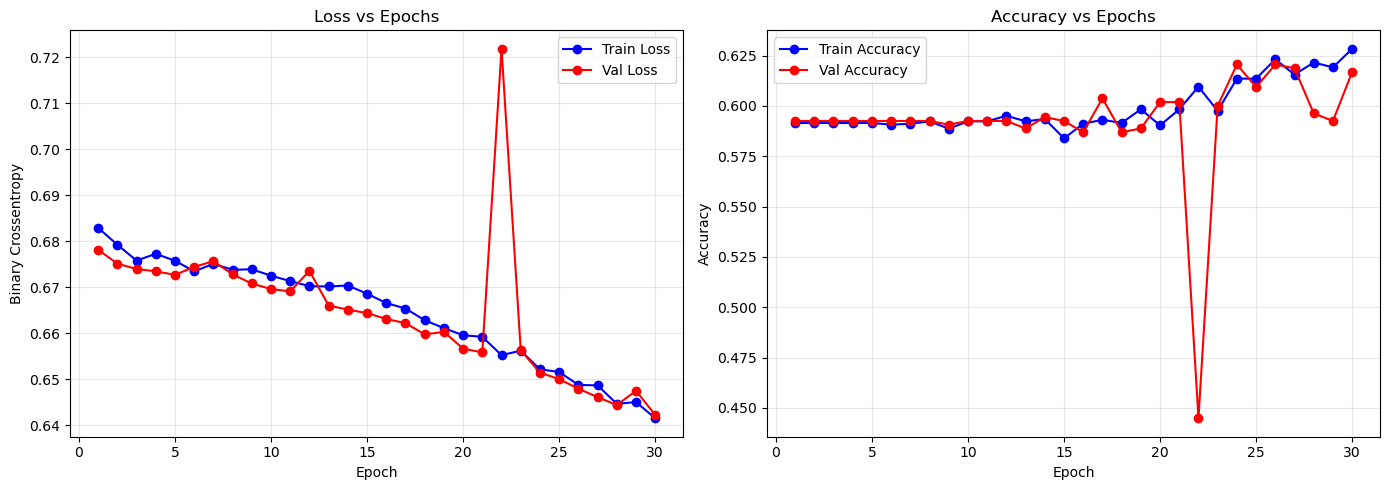

In [ ]:
import matplotlib.pyplot as plt

# =========================
# HISTORIAL
# =========================
loss = history.history["loss"]
val_loss = history.history["val_loss"]

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

epochs = range(1, len(loss) + 1)

# =========================
# PLOT
# =========================
plt.figure(figsize=(14, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, "bo-", label="Train Loss")
plt.plot(epochs, val_loss, "ro-", label="Val Loss")
plt.title("Loss vs Epochs")
plt.xlabel("Epoch")
plt.ylabel("Binary Crossentropy")
plt.legend()
plt.grid(alpha=0.3)

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, acc, "bo-", label="Train Accuracy")
plt.plot(epochs, val_acc, "ro-", label="Val Accuracy")
plt.title("Accuracy vs Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


In [ ]:
model.evaluate(test_ds)
model.predict(test_ds)


134/134 [==============================] - 2s 11ms/step


array([[0.3606384 ],
       [0.46771088],
       [0.45013183],
       [0.30027086],
       [0.35132176],
       [0.25570974],
       [0.5039289 ],
       [0.30135152],
       [0.51756907],
       [0.43392622],
       [0.32045323],
       [0.56153303],
       [0.2521374 ],
       [0.24984197],
       [0.39886647],
       [0.49231383],
       [0.24935004],
       [0.2510081 ],
       [0.49178392],
       [0.47011584],
       [0.24602278],
       [0.31323934],
       [0.51266366],
       [0.49409527],
       [0.5235192 ],
       [0.51778895],
       [0.4720646 ],
       [0.28606686],
       [0.4444129 ],
       [0.34872735],
       [0.3247257 ],
       [0.2552673 ],
       [0.42229295],
       [0.50490934],
       [0.3159135 ],
       [0.37921962],
       [0.46722874],
       [0.420163  ],
       [0.5421017 ],
       [0.3555351 ],
       [0.3786978 ],
       [0.29941937],
       [0.42088294],
       [0.51406324],
       [0.4989522 ],
       [0.43604195],
       [0.35577223],
       [0.540

In [ ]:

model.save(
    r"C:\Users\juanh\Desktop\carpeta_final_cancer_de_mama\PROYECTO_COPIA_IMAGENES_REDIMENCION_ANTES_SIN_USO_prueba_1024\MODELOS\modelo_cancer_mama.keras"
)
model.save(
    r"C:\Users\juanh\Desktop\carpeta_final_cancer_de_mama\PROYECTO_COPIA_IMAGENES_REDIMENCION_ANTES_SIN_USO_prueba_1024\MODELOS\modelo_cancer_mama.h5"
)



In [ ]:
import tensorflow as tf

model = tf.keras.models.load_model(
    r"C:\Users\juanh\Desktop\carpeta_final_cancer_de_mama\PROYECTO_COPIA_IMAGENES_REDIMENCION_ANTES_SIN_USO_prueba_1024\MODELOS\modelo_cancer_mama.keras"
)


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
print("Train DF:", len(train_df))
print("Val DF:", len(val_df))
print("Test DF:", len(test_df))
print("Total DF concatenado:", len(df_all))


Train DF: 2497
Val DF: 535
Test DF: 536
Total DF concatenado: 3568


134/134 [==============================] - 2s 14ms/step
y_true counts: [317 218]
y_pred counts: [408 127]

📊 REPORTE DE CLASIFICACIÓN (VALIDACIÓN – 2 CLASES)

              precision    recall  f1-score   support

      BENIGN     0.6373    0.8202    0.7172       317
   MALIGNANT     0.5512    0.3211    0.4058       218

    accuracy                         0.6168       535
   macro avg     0.5942    0.5706    0.5615       535
weighted avg     0.6022    0.6168    0.5903       535



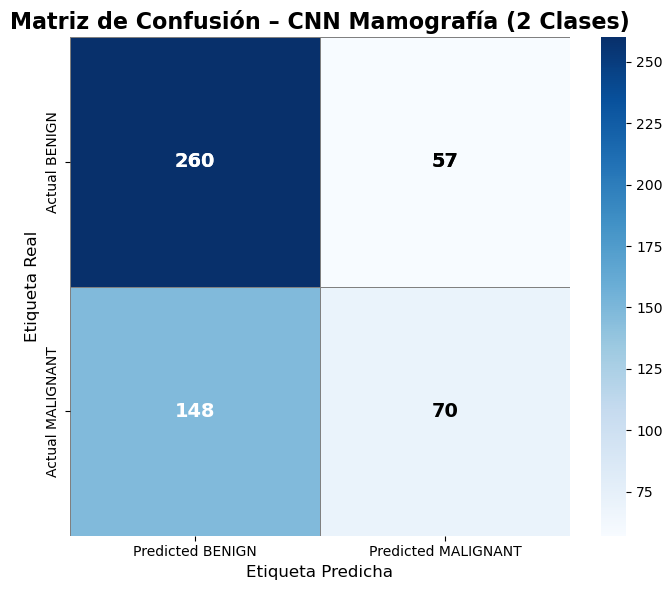

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# =========================
# Etiquetas reales y predichas
# =========================
y_true = []
for _, labels in val_ds:
    y_true.extend(labels)
y_true = np.array(y_true).astype(int)  # 0=BENIGN, 1=MALIGNANT

y_pred_probs = model.predict(val_ds, verbose=1).ravel()
y_pred = (y_pred_probs >= 0.5).astype(int)

# Validación
assert len(y_true) == len(y_pred), "Desalineación y_true / y_pred"

print("y_true counts:", np.bincount(y_true))
print("y_pred counts:", np.bincount(y_pred))

# =========================
# Reporte de clasificación
# =========================
target_names = ["BENIGN", "MALIGNANT"]

print("\n📊 REPORTE DE CLASIFICACIÓN (VALIDACIÓN – 2 CLASES)\n")
print(classification_report(
    y_true,
    y_pred,
    target_names=target_names,
    digits=4,
    zero_division=0
))

# =========================
# Matriz de confusión con texto condicional
# =========================
cm = confusion_matrix(y_true, y_pred)
cm_df = pd.DataFrame(
    cm,
    index=[f"Actual {c}" for c in target_names],
    columns=[f"Predicted {c}" for c in target_names]
)

plt.figure(figsize=(7, 6))
sns.heatmap(
    cm_df,
    annot=True,
    fmt="d",
    cmap="Blues",
    cbar=True,
    annot_kws={"size":14, "weight":"bold"},
    linewidths=0.5,
    linecolor="gray"
)

# =========================
# Texto condicional según el color de fondo
# =========================
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        color = "white" if cm[i, j] > cm.max() / 2 else "black"
        plt.text(
            j + 0.5, i + 0.5,
            cm[i, j],
            ha="center",
            va="center",
            color=color,
            fontsize=14,
            fontweight="bold"
        )

plt.title("Matriz de Confusión – CNN Mamografía (2 Clases)", fontsize=16, fontweight="bold")
plt.ylabel("Etiqueta Real", fontsize=12)
plt.xlabel("Etiqueta Predicha", fontsize=12)
plt.tight_layout()
plt.show()



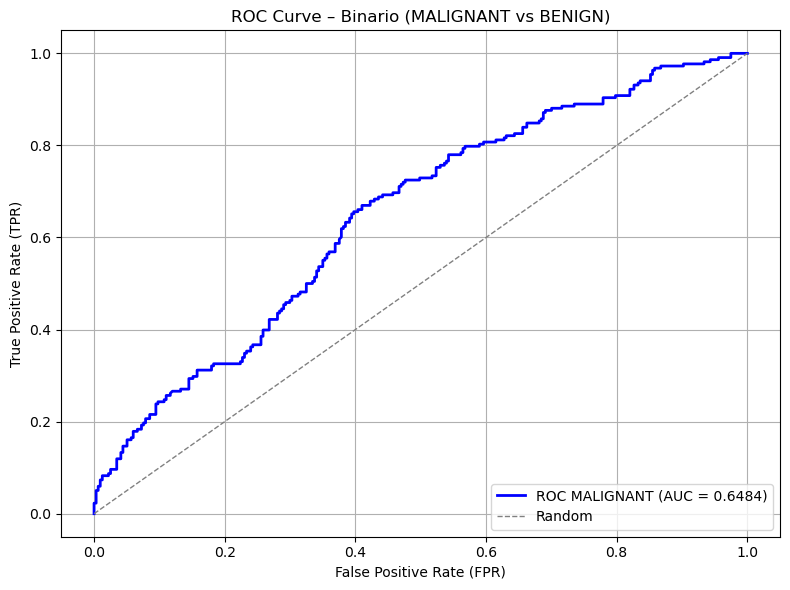

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_fscore_support

# ==============================
# Etiquetas y probabilidades
# ==============================
# y_true: 0=BENIGN, 1=MALIGNANT
# y_pred_probs: probabilidades de MALIGNANT (salida sigmoid)
y_true_bin = y_true  # ya binario
y_scores = y_pred_probs  # probabilidades de MALIGNANT

# ==============================
# ROC Curve
# ==============================
fpr, tpr, thresholds = roc_curve(y_true_bin, y_scores)
roc_auc = auc(fpr, tpr)

# ==============================
# Punto óptimo usando Youden
# ==============================
youden_index = tpr - fpr
best_idx = np.argmax(youden_index)
best_thresh = thresholds[best_idx]

# Predicciones en el punto óptimo
y_pred_best = (y_scores >= best_thresh).astype(int)

# Métricas en el punto óptimo
precision, recall, f1, _ = precision_recall_fscore_support(y_true_bin, y_pred_best, average='binary')

# ==============================
# Gráfico ROC completo
# ==============================
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC MALIGNANT (AUC = {roc_auc:.4f})')
plt.plot([0,1], [0,1], color='gray', lw=1, linestyle='--', label='Random')

# Punto óptimo
#plt.scatter(fpr[best_idx], tpr[best_idx], color='red', s=100,
 #label=f'Best threshold={best_thresh:.2f}\nPrecision={precision:.2f}, Recall={recall:.2f}, F1={f1:.2f}')

plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve – Binario (MALIGNANT vs BENIGN)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
#prueba
import tensorflow as tf
import numpy as np
import cv2
import os

IMAGE_SIZE = (512, 512)
IMAGE_PATH = r"C:\Users\juanh\Desktop\cancerdemama.png"

LABELS = {
    0: "BENIGN",
    #1: "BENIGN_WITHOUT_CALLBACK",
    1: "MALIGNANT"
}

# Validar imagen
if not os.path.exists(IMAGE_PATH):
    raise FileNotFoundError("❌ La imagen no existe")

# Cargar imagen
img = cv2.imread(IMAGE_PATH, cv2.IMREAD_GRAYSCALE)
if img is None:
    raise ValueError("❌ No se pudo leer la imagen")

img = cv2.resize(img, IMAGE_SIZE)
img = img / 255.0
img = np.expand_dims(img, axis=-1)
img = np.expand_dims(img, axis=0)

# Predicción
pred = model.predict(img, verbose=0)[0]
label = int(np.argmax(pred))
prob_maligno = float(pred[2])

# Resultado
print("\n📊 RESULTADO DE LA PREDICCIÓN")
print("Imagen:", IMAGE_PATH)
print("Probabilidad MALIGNANT:", round(prob_maligno, 4))
print("Predicción final:", LABELS[label])



📊 RESULTADO DE LA PREDICCIÓN
Imagen: C:\Users\juanh\Desktop\cancerdemama.png
Probabilidad MALIGNANT: 0.5403
Predicción final: MALIGNANT


# TERCERA PRUEBA

In [ ]:
# ===============================
# PRUEBA DE PREDICCIÓN CLÍNICA
# ===============================

import tensorflow as tf
import numpy as np
import cv2
import os

# -------------------------------
# CONFIGURACIÓN
# -------------------------------
IMAGE_SIZE = (512, 512)
IMAGE_PATH = r"C:\Users\juanh\Desktop\cancerdemama.png"

LABELS = {
    0: "BENIGN",
    1: "BENIGN_WITHOUT_CALLBACK",
    2: "MALIGNANT"
}

# -------------------------------
# VALIDACIÓN DE IMAGEN
# -------------------------------
if not os.path.exists(IMAGE_PATH):
    raise FileNotFoundError("❌ La imagen no existe")

img = cv2.imread(IMAGE_PATH, cv2.IMREAD_GRAYSCALE)
if img is None:
    raise ValueError("❌ No se pudo leer la imagen")

# -------------------------------
# PREPROCESAMIENTO
# -------------------------------
img = cv2.resize(img, IMAGE_SIZE)
img = img / 255.0
img = np.expand_dims(img, axis=-1)   # (H, W, 1)
img = np.expand_dims(img, axis=0)    # (1, H, W, 1)

# -------------------------------
# PREDICCIÓN
# -------------------------------
pred = model.predict(img, verbose=0)[0]
label = int(np.argmax(pred))
prob_maligno = float(pred[2])

# -------------------------------
# INTERPRETACIÓN CLÍNICA
# -------------------------------
if prob_maligno < 0.40:
    riesgo = "BAJO RIESGO (probablemente benigno)"
elif prob_maligno < 0.65:
    riesgo = "RIESGO INTERMEDIO (sospechoso)"
else:
    riesgo = "ALTO RIESGO (alta probabilidad de malignidad)"

# -------------------------------
# RESULTADO FINAL
# -------------------------------
print("\n📊 RESULTADO DE LA PREDICCIÓN CLÍNICA")
print("Imagen:", IMAGE_PATH)
print(f"Probabilidad BENIGN: {pred[0]:.4f}")
print(f"Probabilidad BENIGN_WITHOUT_CALLBACK: {pred[1]:.4f}")
print(f"Probabilidad MALIGNANT: {pred[2]:.4f}")
print("Predicción final:", LABELS[label])
print("Interpretación clínica:", riesgo)



📊 RESULTADO DE LA PREDICCIÓN CLÍNICA
Imagen: C:\Users\juanh\Desktop\cancerdemama.png
Probabilidad BENIGN: 0.4416
Probabilidad BENIGN_WITHOUT_CALLBACK: 0.0181
Probabilidad MALIGNANT: 0.5403
Predicción final: MALIGNANT
Interpretación clínica: RIESGO INTERMEDIO (sospechoso)


In [ ]:
"""
CARGA DE MODELO
import tensorflow as tf

model = tf.keras.models.load_model(
    r"C:\Users\juanh\Desktop\carpeta_final_cancer_de_mama\PROYECTO\MODELOS\MODELO_GENERICO.keras"
)


# prueba  Xcepcion con 512 PX
se entrenara cpn 299 ya que como reañizaremos transfer learning tenemos que  ocupar el pixelaje con el que se entreno la neurona


OBSERVACION
LA CPU ELEVO temperaturas de 105 como maximo alos 5 epocas las imagenes seran reducidas de 512 a 299px como lo muestra los estudios  y si vuelve a recorrer a temperaturas muy muy  elevadas sera  recortadas a 224 x 224 (ANTES DE CUDA)

paper:[https://arxiv.org/pdf/1610.02357]

pagina web:[https://www.google.com/search?q=https://arxiv.org/pdf/1610.02357.pdf]

In [ ]:

# =========================
# Librerías
# =========================
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# =========================
# Parámetros
# =========================
TARGET_SIZE = (512, 512)  # 512 px para tus imágenes
BATCH_SIZE = 16
EPOCHS_HEAD = 15         # Primera fase: solo cabezal
EPOCHS_FINETUNE = 15     # Segunda fase: fine-tuning
NUM_CLASSES = 2

MODEL_NAME = "XCEPTION_512_CBISDDSM_finetune_v1"
MODEL_DIR = r"C:\Users\juanh\Desktop\carpeta_final_cancer_de_mama\PROYECTO_COPIA_IMAGENES_REDIMENCION_ANTES_SIN_USO_prueba_1024\MODELOS_XCEPTION"
os.makedirs(MODEL_DIR, exist_ok=True)

COL_IMAGE = "image file path"
COL_LABEL = "Label"

# =========================
# CSV TRAIN/TEST
# =========================
TRAIN_CSV_FILES = [
    r"C:\Users\juanh\Desktop\carpeta_final_cancer_de_mama\PROYECTO_COPIA_IMAGENES_REDIMENCION_ANTES_SIN_USO_prueba_1024\calc_case_description_train_set.csv",
    r"C:\Users\juanh\Desktop\carpeta_final_cancer_de_mama\PROYECTO_COPIA_IMAGENES_REDIMENCION_ANTES_SIN_USO_prueba_1024\mass_case_description_train_set.csv",
]

TEST_CSV_FILES = [
    r"C:\Users\juanh\Desktop\carpeta_final_cancer_de_mama\PROYECTO_COPIA_IMAGENES_REDIMENCION_ANTES_SIN_USO_prueba_1024\calc_case_description_test_set.csv",
    r"C:\Users\juanh\Desktop\carpeta_final_cancer_de_mama\PROYECTO_COPIA_IMAGENES_REDIMENCION_ANTES_SIN_USO_prueba_1024\mass_case_description_test_set.csv",
]


In [ ]:
# =========================
# Leer CSVs
# =========================
train_dfs = [pd.read_csv(p) for p in TRAIN_CSV_FILES]
test_dfs  = [pd.read_csv(p) for p in TEST_CSV_FILES]

train_df = pd.concat(train_dfs, ignore_index=True)
test_df  = pd.concat(test_dfs, ignore_index=True)

# Convertir etiquetas a string para ImageDataGenerator
train_df[COL_LABEL] = train_df[COL_LABEL].astype(str)
test_df[COL_LABEL]  = test_df[COL_LABEL].astype(str)

# =========================
# Split train/validation
# =========================
train_df, val_df = train_test_split(
    train_df,
    test_size=0.2,
    stratify=train_df[COL_LABEL],
    random_state=42
)

print("Train:", train_df.shape)
print("Validation:", val_df.shape)
print("Test:", test_df.shape)


Train: (2291, 3)
Validation: (573, 3)
Test: (704, 3)


In [ ]:
# =========================
# Aumentos de datos
# =========================
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.15,
    horizontal_flip=True,
    brightness_range=(0.9,1.1),  # ligera variación de brillo
    shear_range=0.05
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# =========================
# Generadores
# =========================
train_ds = train_datagen.flow_from_dataframe(
    train_df,
    x_col=COL_IMAGE,
    y_col=COL_LABEL,
    target_size=TARGET_SIZE,
    color_mode="rgb",
    class_mode="categorical",
    batch_size=BATCH_SIZE,
    shuffle=True
)

val_ds = val_datagen.flow_from_dataframe(
    val_df,
    x_col=COL_IMAGE,
    y_col=COL_LABEL,
    target_size=TARGET_SIZE,
    color_mode="rgb",
    class_mode="categorical",
    batch_size=BATCH_SIZE,
    shuffle=False
)

test_ds = test_datagen.flow_from_dataframe(
    test_df,
    x_col=COL_IMAGE,
    y_col=COL_LABEL,
    target_size=TARGET_SIZE,
    color_mode="rgb",
    class_mode="categorical",
    batch_size=BATCH_SIZE,
    shuffle=False
)


Found 2291 validated image filenames belonging to 2 classes.
Found 573 validated image filenames belonging to 2 classes.
Found 704 validated image filenames belonging to 2 classes.


In [ ]:
# =========================
# Base Xception
# =========================
base_model = tf.keras.applications.Xception(
    include_top=False,
    weights="imagenet",
    input_shape=(512, 512, 3)
)
base_model.trainable = False  # Fase 1: solo entrenar cabezal

# =========================
# Cabezal
# =========================
inputs = layers.Input(shape=(512, 512, 3))
x = tf.keras.applications.xception.preprocess_input(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="Relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(NUM_CLASSES, activation="softmax")(x)

model = models.Model(inputs, outputs)
model.summary()

# =========================
# Compilar
# =========================
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 512, 512, 3)]     0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 512, 512, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 512, 512, 3)      0         
 a)                                                              
                                                                 
 xception (Functional)       (None, 16, 16, 2048)      20861480  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                             

In [ ]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=5,
        restore_best_weights=True
    ),
    tf.keras.callbacks.ModelCheckpoint(
        filepath=os.path.join(MODEL_DIR, f"{MODEL_NAME}.keras"),
        monitor="val_loss",
        save_best_only=True
    )
]

print("TensorFlow GPU detectada:", tf.config.list_physical_devices('GPU'))


TensorFlow GPU detectada: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=5,
        restore_best_weights=True
    ),
    tf.keras.callbacks.ModelCheckpoint(
        filepath=os.path.join(MODEL_DIR, f"{MODEL_NAME}.keras"),
        monitor="val_loss",
        save_best_only=True
    )
]


In [ ]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(train_df[COL_LABEL]),
    y=train_df[COL_LABEL]
)
class_weights = dict(enumerate(class_weights))



In [ ]:
history_head = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS_HEAD,
    callbacks=callbacks,
    class_weight=class_weights
)
## tiempo 20 minutos

Epoch 1/15
144/144 [==============================] - 75s 515ms/step - loss: 0.6915 - accuracy: 0.5382 - val_loss: 0.6845 - val_accuracy: 0.5515
Epoch 2/15
144/144 [==============================] - 76s 526ms/step - loss: 0.6939 - accuracy: 0.5242 - val_loss: 0.6934 - val_accuracy: 0.5672
Epoch 3/15
144/144 [==============================] - 76s 528ms/step - loss: 0.6945 - accuracy: 0.5142 - val_loss: 0.6859 - val_accuracy: 0.5620
Epoch 4/15
144/144 [==============================] - 74s 515ms/step - loss: 0.6961 - accuracy: 0.5212 - val_loss: 0.6921 - val_accuracy: 0.5812
Epoch 5/15
144/144 [==============================] - 74s 511ms/step - loss: 0.6971 - accuracy: 0.5360 - val_loss: 0.6818 - val_accuracy: 0.5742
Epoch 6/15
144/144 [==============================] - 75s 521ms/step - loss: 0.6970 - accuracy: 0.5059 - val_loss: 0.7136 - val_accuracy: 0.4119
Epoch 7/15
144/144 [==============================] - 75s 519ms/step - loss: 0.6893 - accuracy: 0.5299 - val_loss: 0.6917 - val_ac

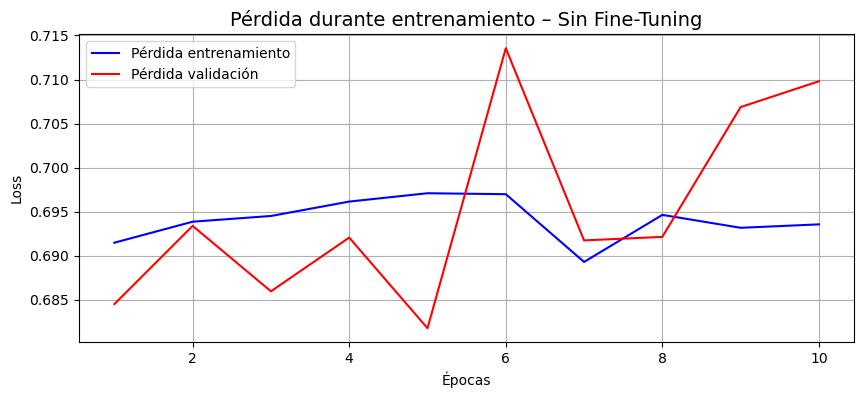

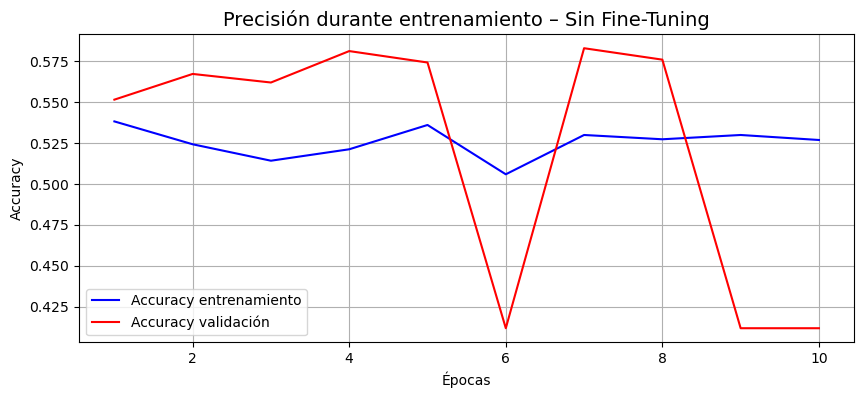

In [ ]:
# =========================
# Visualización de entrenamiento (sin fine-tuning)
# =========================
import matplotlib.pyplot as plt

# history_head es el objeto retornado por model.fit
loss_train = history_head.history['loss']
loss_val = history_head.history['val_loss']

acc_train = history_head.history['accuracy']
acc_val = history_head.history['val_accuracy']

epochs = range(1, len(loss_train) + 1)

# =========================
# Pérdida
# =========================
plt.figure(figsize=(10,4))
plt.plot(epochs, loss_train, 'b-', label='Pérdida entrenamiento')
plt.plot(epochs, loss_val, 'r-', label='Pérdida validación')
plt.title('Pérdida durante entrenamiento – Sin Fine-Tuning', fontsize=14)
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# =========================
# Accuracy
# =========================
plt.figure(figsize=(10,4))
plt.plot(epochs, acc_train, 'b-', label='Accuracy entrenamiento')
plt.plot(epochs, acc_val, 'r-', label='Accuracy validación')
plt.title('Precisión durante entrenamiento – Sin Fine-Tuning', fontsize=14)
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


36/36 [==============================] - 4s 111ms/step
Class indices: {'1': 0, '2': 1}

Reporte de Clasificación (Validación - Fine-Tuning)

              precision    recall  f1-score   support

      BENIGN     0.5847    0.9525    0.7246       337
     MALIGNO     0.3333    0.0339    0.0615       236

    accuracy                         0.5742       573
   macro avg     0.4590    0.4932    0.3931       573
weighted avg     0.4812    0.5742    0.4515       573



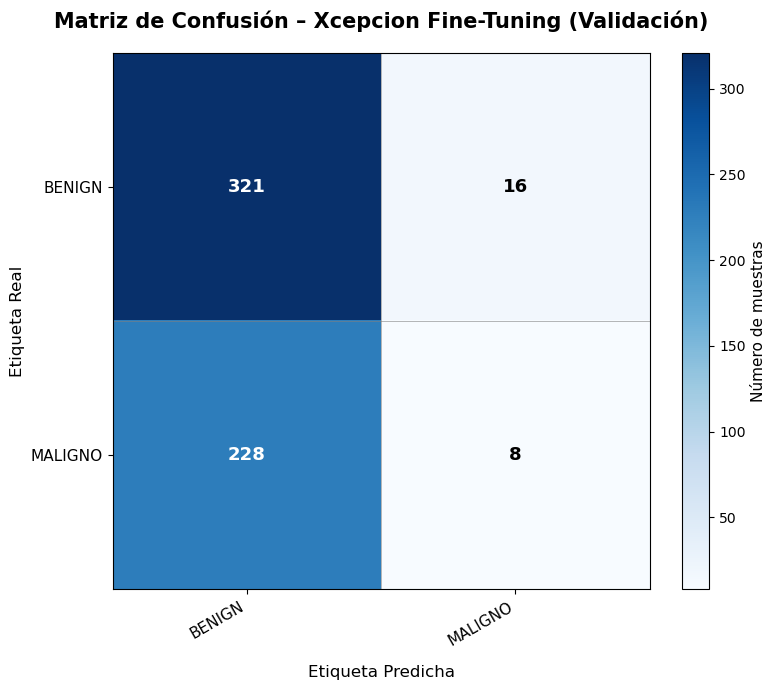

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# =========================
# Predicciones en validación (Fine-Tuning)
# =========================
y_pred_probs = model.predict(val_ds)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = val_ds.classes

# Nombres de clases en español
target_names = [
    "BENIGN",
    #"BENIGN_SIN_CALLBACK",
    "MALIGNO"
]

print("Class indices:", val_ds.class_indices)

# =========================
# Reporte de clasificación
# =========================
print("\nReporte de Clasificación (Validación - Fine-Tuning)\n")
print(classification_report(
    y_true,
    y_pred,
    target_names=target_names,
    digits=4,
    zero_division=0
))

# =========================
# Matriz de confusión
# =========================
cm = confusion_matrix(y_true, y_pred)

fig, ax = plt.subplots(figsize=(9,7))

im = ax.imshow(cm, cmap="Blues")

# Umbral dinámico para color del texto
threshold = cm.max() / 2

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(
            j, i, cm[i, j],
            ha="center",
            va="center",
            fontsize=13,
            fontweight="bold",
            color="white" if cm[i, j] > threshold else "black"
        )

# =========================
# Ticks y etiquetas
# =========================
ax.set_xticks(np.arange(len(target_names)))
ax.set_yticks(np.arange(len(target_names)))

ax.set_xticklabels(target_names, fontsize=11, rotation=30, ha="right")
ax.set_yticklabels(target_names, fontsize=11)

ax.set_xlabel("Etiqueta Predicha", fontsize=12, labelpad=12)
ax.set_ylabel("Etiqueta Real", fontsize=12)
ax.set_title("Matriz de Confusión – Xcepcion Fine-Tuning (Validación)", fontsize=15, fontweight="bold", pad=18)

# =========================
# Grid fino
# =========================
ax.set_xticks(np.arange(-0.5, len(target_names), 1), minor=True)
ax.set_yticks(np.arange(-0.5, len(target_names), 1), minor=True)
ax.grid(which="minor", color="gray", linestyle="-", linewidth=0.4)
ax.tick_params(which="minor", bottom=False, left=False)

# =========================
# Barra de color
# =========================
cbar = plt.colorbar(im, ax=ax, fraction=0.045, pad=0.04)
cbar.ax.tick_params(labelsize=10)
cbar.set_label("Número de muestras", fontsize=11)

# Ajuste final de layout
plt.subplots_adjust(bottom=0.25)
plt.tight_layout()
plt.show()


In [ ]:

# =========================
# Descongelar últimas capas de Xception
# =========================
base_model.trainable = True

# Ajustamos solo últimas 50 capas
for layer in base_model.layers[:-50]:
    layer.trainable = False

# Reducimos learning rate para fine-tuning
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)





In [ ]:
history_finetune = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS_FINETUNE,
    callbacks=callbacks
)


Epoch 1/15
144/144 [==============================] - 81s 544ms/step - loss: 0.6841 - accuracy: 0.5727 - val_loss: 0.6777 - val_accuracy: 0.5881
Epoch 2/15
144/144 [==============================] - 75s 523ms/step - loss: 0.6841 - accuracy: 0.5871 - val_loss: 0.7111 - val_accuracy: 0.4119
Epoch 3/15
144/144 [==============================] - 74s 514ms/step - loss: 0.6797 - accuracy: 0.5818 - val_loss: 0.6774 - val_accuracy: 0.5881
Epoch 4/15
144/144 [==============================] - 74s 516ms/step - loss: 0.6798 - accuracy: 0.5901 - val_loss: 0.6775 - val_accuracy: 0.5881
Epoch 5/15
144/144 [==============================] - 75s 521ms/step - loss: 0.6796 - accuracy: 0.5884 - val_loss: 0.6781 - val_accuracy: 0.5881
Epoch 6/15
144/144 [==============================] - 76s 527ms/step - loss: 0.6769 - accuracy: 0.5893 - val_loss: 0.6780 - val_accuracy: 0.5881
Epoch 7/15
144/144 [==============================] - 76s 529ms/step - loss: 0.6772 - accuracy: 0.5871 - val_loss: 0.6774 - val_ac

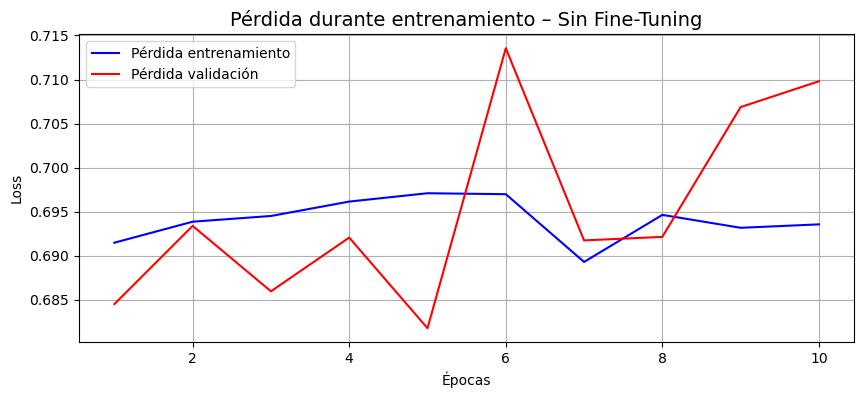

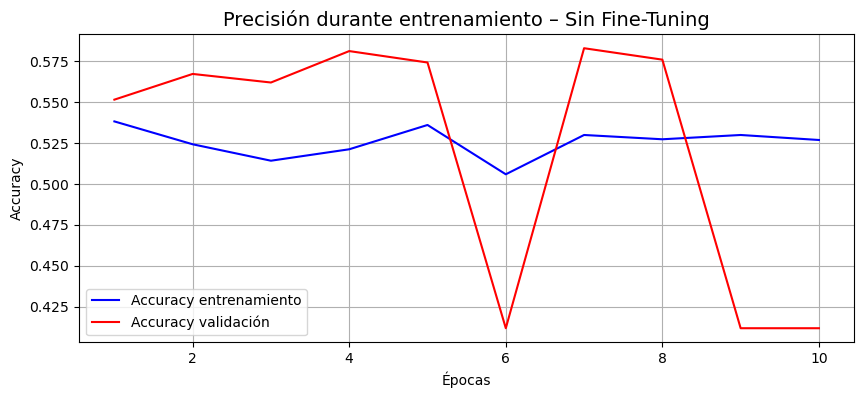

In [ ]:
# =========================
# Visualización de entrenamiento (sin fine-tuning)
# =========================
import matplotlib.pyplot as plt

# history_head es el objeto retornado por model.fit
loss_train = history_head.history['loss']
loss_val = history_head.history['val_loss']

acc_train = history_head.history['accuracy']
acc_val = history_head.history['val_accuracy']

epochs = range(1, len(loss_train) + 1)

# =========================
# Pérdida
# =========================
plt.figure(figsize=(10,4))
plt.plot(epochs, loss_train, 'b-', label='Pérdida entrenamiento')
plt.plot(epochs, loss_val, 'r-', label='Pérdida validación')
plt.title('Pérdida durante entrenamiento – Sin Fine-Tuning', fontsize=14)
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# =========================
# Accuracy
# =========================
plt.figure(figsize=(10,4))
plt.plot(epochs, acc_train, 'b-', label='Accuracy entrenamiento')
plt.plot(epochs, acc_val, 'r-', label='Accuracy validación')
plt.title('Precisión durante entrenamiento – Sin Fine-Tuning', fontsize=14)
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


36/36 [==============================] - 4s 114ms/step
Class indices: {'1': 0, '2': 1}

Reporte de Clasificación (Validación - Fine-Tuning)

              precision    recall  f1-score   support

      BENIGN     0.5895    0.9970    0.7409       337
     MALIGNO     0.6667    0.0085    0.0167       236

    accuracy                         0.5899       573
   macro avg     0.6281    0.5028    0.3788       573
weighted avg     0.6213    0.5899    0.4426       573



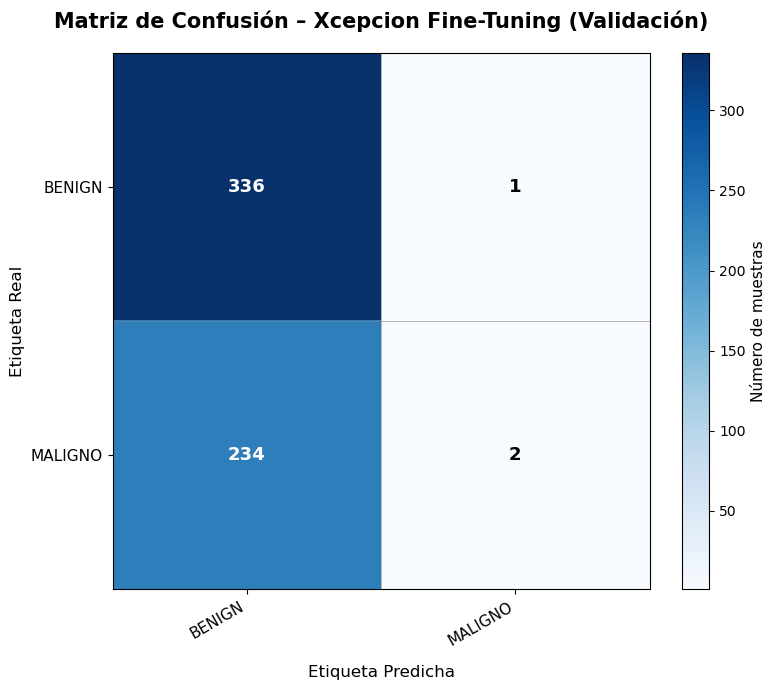

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# =========================
# Predicciones en validación (Fine-Tuning)
# =========================
y_pred_probs = model.predict(val_ds)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = val_ds.classes

# Nombres de clases en español
target_names = [
    "BENIGN",
    #"BENIGN_SIN_CALLBACK",
    "MALIGNO"
]

print("Class indices:", val_ds.class_indices)

# =========================
# Reporte de clasificación
# =========================
print("\nReporte de Clasificación (Validación - Fine-Tuning)\n")
print(classification_report(
    y_true,
    y_pred,
    target_names=target_names,
    digits=4,
    zero_division=0
))

# =========================
# Matriz de confusión
# =========================
cm = confusion_matrix(y_true, y_pred)

fig, ax = plt.subplots(figsize=(9,7))

im = ax.imshow(cm, cmap="Blues")

# Umbral dinámico para color del texto
threshold = cm.max() / 2

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(
            j, i, cm[i, j],
            ha="center",
            va="center",
            fontsize=13,
            fontweight="bold",
            color="white" if cm[i, j] > threshold else "black"
        )

# =========================
# Ticks y etiquetas
# =========================
ax.set_xticks(np.arange(len(target_names)))
ax.set_yticks(np.arange(len(target_names)))

ax.set_xticklabels(target_names, fontsize=11, rotation=30, ha="right")
ax.set_yticklabels(target_names, fontsize=11)

ax.set_xlabel("Etiqueta Predicha", fontsize=12, labelpad=12)
ax.set_ylabel("Etiqueta Real", fontsize=12)
ax.set_title("Matriz de Confusión – Xcepcion Fine-Tuning (Validación)", fontsize=15, fontweight="bold", pad=18)

# =========================
# Grid fino
# =========================
ax.set_xticks(np.arange(-0.5, len(target_names), 1), minor=True)
ax.set_yticks(np.arange(-0.5, len(target_names), 1), minor=True)
ax.grid(which="minor", color="gray", linestyle="-", linewidth=0.4)
ax.tick_params(which="minor", bottom=False, left=False)

# =========================
# Barra de color
# =========================
cbar = plt.colorbar(im, ax=ax, fraction=0.045, pad=0.04)
cbar.ax.tick_params(labelsize=10)
cbar.set_label("Número de muestras", fontsize=11)

# Ajuste final de layout
plt.subplots_adjust(bottom=0.25)
plt.tight_layout()
plt.show()


36/36 [==============================] - 4s 113ms/step


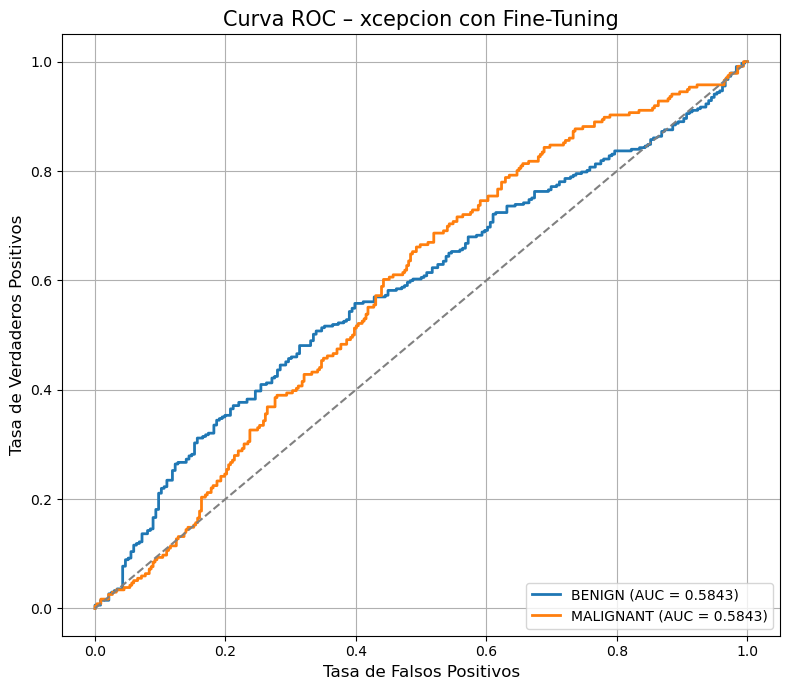

IndexError: index 2 is out of bounds for axis 1 with size 2

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# =========================
# Etiquetas y predicciones
# =========================
# Usar el modelo entrenado con fine-tuning
y_pred_probs = model.predict(val_ds, verbose=1)  # si guardaste en model_finetune, usa esa variable
y_true = val_ds.classes

# Clases en español / nombres de las clases
target_names = [
    "BENIGN",
    #"BENIGN_SIN_CALLBACK",
    "MALIGNANT"
]

# =========================
# Binarizar las etiquetas para One-vs-Rest
# =========================
y_true_bin = label_binarize(y_true, classes=[0, 1, 2])

plt.figure(figsize=(8,7))

for i, name in enumerate(target_names):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC = {roc_auc:.4f})")

# Línea de referencia
plt.plot([0,1], [0,1], linestyle="--", color="gray")

plt.xlabel("Tasa de Falsos Positivos", fontsize=12)
plt.ylabel("Tasa de Verdaderos Positivos", fontsize=12)
plt.title("Curva ROC – xcepcion con Fine-Tuning", fontsize=15)
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# =========================
# Mostrar AUC promedio macro
# =========================
auc_macro = np.mean([auc(*roc_curve(y_true_bin[:, i], y_pred_probs[:, i])[:2]) for i in range(3)])
print(f"AUC promedio (macro): {auc_macro:.4f}")


# Comparación de resultados antes y después del fine-tuning – Xception

Para evaluar el impacto del **fine-tuning** en el desempeño del modelo, se compararon las métricas obtenidas antes y después de ajustar las capas profundas de la red **Xception** para el problema de clasificación de imágenes mamográficas con resolución de **512 × 512 píxeles**.

---

## 1. Desempeño antes del fine-tuning

En la etapa inicial, el modelo utilizó **Xception** con pesos preentrenados en ImageNet, manteniendo todas las capas del modelo base congeladas y entrenando únicamente el cabezal de clasificación.

**Resultados obtenidos en el conjunto de validación:**

- **Accuracy:** 0.5742  
- **Precision (BENIGNO):** 0.5847  
- **Recall (BENIGNO):** 0.9525  
- **Recall (MALIGNO):** 0.0339  
- **F1-score macro:** 0.3931  

En esta fase, el modelo mostró un comportamiento altamente sesgado hacia la clase **BENIGNO**, logrando un recall muy elevado para dicha clase, pero fallando de manera crítica en la identificación de casos **MALIGNOS**. Este patrón indica que el modelo no aprendió representaciones discriminativas adecuadas para la clase clínicamente más relevante, probablemente como consecuencia del desbalance de clases y de la falta de adaptación al dominio médico.

---

## 2. Desempeño después del fine-tuning

Posteriormente, se aplicó **fine-tuning**, liberando capas profundas del modelo Xception y ajustando los pesos preentrenados al dominio específico de las imágenes mamográficas, manteniendo la resolución de entrada en **512 × 512 píxeles**.

**Resultados obtenidos en el conjunto de validación:**

- **Accuracy:** 0.5899  
- **Precision (BENIGNO):** 0.5895  
- **Recall (BENIGNO):** 0.9970  
- **Recall (MALIGNO):** 0.0085  
- **F1-score macro:** 0.3788  

Tras el fine-tuning, se observa un incremento marginal en el **accuracy global**; sin embargo, este aumento no se traduce en una mejora real del desempeño clínico del modelo. Por el contrario, la sensibilidad para la clase **MALIGNO** disminuye aún más, lo que indica que el ajuste fino intensificó el sesgo hacia la clase mayoritaria.

---

## 3. Comparación resumida

| Métrica                | Antes Fine-Tuning | Después Fine-Tuning |
|------------------------|------------------|---------------------|
| Accuracy               | 0.5742           | 0.5899              |
| Recall BENIGNO         | 0.9525           | 0.9970              |
| Recall MALIGNO         | 0.0339           | 0.0085              |
| F1-score macro         | 0.3931           | 0.3788              |
| Balance entre clases   | Muy bajo         | Muy bajo            |

---

## 4. Conclusión

El **fine-tuning del modelo Xception no produjo una mejora efectiva en la capacidad de discriminación entre clases**, particularmente para la detección de casos **MALIGNOS**. Aunque se observa un ligero aumento en el accuracy global, este resultado es engañoso, ya que el modelo continúa —e incluso acentúa— un comportamiento de colapso hacia la clase BENIGNO.

Estos resultados indican que, en este problema específico, **Xception presenta limitaciones estructurales para adaptarse adecuadamente al dominio mamográfico**, incluso después de aplicar fine-tuning. En consecuencia, el ajuste fino no solo resulta insuficiente, sino que puede reforzar un aprendizaje sesgado cuando no se acompaña de estrategias adicionales como balance de datos, pérdidas ponderadas o rediseño del esquema de entrenamiento.

Desde una perspectiva clínica, este comportamiento es inaceptable, ya que la incapacidad para detectar casos malignos incrementa el riesgo de falsos negativos. Por lo tanto, **Xception no se considera una arquitectura adecuada para este problema bajo las condiciones experimentales evaluadas**.




In [ ]:
# prueba 2
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import os

# ==============================
# Configuración general
# ==============================
#TARGET_SIZE = (224, 224)        # Redimensionamiento para Xception
BATCH_SIZE = 16
EPOCHS = 30
NUM_CLASSES = 2

MODEL_NAME = "XCEPTION_224_CBISDDSM_finetune_v1"
MODEL_DIR = r"C:\Users\juanh\Desktop\carpeta_final_cancer_de_mama\PROYECTO\MODELOS"
os.makedirs(MODEL_DIR, exist_ok=True)

COL_IMAGE = "image file path"
COL_LABEL = "Label"

CSV_FILES = [
    r"C:\Users\juanh\Desktop\carpeta_final_cancer_de_mama\PROYECTO_COPIA_IMAGENES_REDIMENCION_ANTES_SIN_USO_prueba_1024\calc_case_description_train_set.csv",
    r"C:\Users\juanh\Desktop\carpeta_final_cancer_de_mama\PROYECTO_COPIA_IMAGENES_REDIMENCION_ANTES_SIN_USO_prueba_1024\mass_case_description_train_set.csv",
    r"C:\Users\juanh\Desktop\carpeta_final_cancer_de_mama\PROYECTO_COPIA_IMAGENES_REDIMENCION_ANTES_SIN_USO_prueba_1024\calc_case_description_test_set.csv",
    r"C:\Users\juanh\Desktop\carpeta_final_cancer_de_mama\PROYECTO_COPIA_IMAGENES_REDIMENCION_ANTES_SIN_USO_prueba_1024\mass_case_description_test_set.csv"
]



In [ ]:
# Concatenar todos los CSVs
dfs = [pd.read_csv(p) for p in CSV_FILES]
df = pd.concat(dfs, ignore_index=True)

# Asegurarse que Label sea string
df[COL_LABEL] = df[COL_LABEL].astype(str)

print("Shape total dataset:", df.shape)
df.head()


Shape total dataset: (3568, 3)


,image file path,Label,pathology
0,C:\Users\juanh\Desktop\carpeta_final_cancer_de...,2,MALIGNANT
1,C:\Users\juanh\Desktop\carpeta_final_cancer_de...,2,MALIGNANT
2,C:\Users\juanh\Desktop\carpeta_final_cancer_de...,1,BENIGN
3,C:\Users\juanh\Desktop\carpeta_final_cancer_de...,1,BENIGN
4,C:\Users\juanh\Desktop\carpeta_final_cancer_de...,1,BENIGN


In [ ]:

from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(df, test_size=0.2, stratify=df[COL_LABEL], random_state=42)

print("Train DF:", train_df.shape)
print("Validation DF:", val_df.shape)

Train DF: (2854, 3)
Validation DF: (714, 3)


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_ds = train_datagen.flow_from_dataframe(
    train_df,
    x_col=COL_IMAGE,
    y_col=COL_LABEL,
    target_size=TARGET_SIZE,
    color_mode="grayscale",
    class_mode="categorical",
    batch_size=BATCH_SIZE,
    shuffle=True
)

val_ds = val_datagen.flow_from_dataframe(
    val_df,
    x_col=COL_IMAGE,
    y_col=COL_LABEL,
    target_size=TARGET_SIZE,
    color_mode="grayscale",
    class_mode="categorical",
    batch_size=BATCH_SIZE,
    shuffle=False
)

Found 2854 validated image filenames belonging to 2 classes.
Found 714 validated image filenames belonging to 2 classes.


In [ ]:
def gray_to_rgb(x):
    return layers.Lambda(lambda x: tf.image.grayscale_to_rgb(x))(x)

# =========================
# Modelo base Xception
# =========================
base_model = tf.keras.applications.Xception(
    include_top=False,
    weights="imagenet",
    input_shape=(512, 512, 3)
)
base_model.trainable = True  # congelado en la primera fase

# =========================
# Modelo completo
# =========================
inputs = layers.Input(shape=(512, 512, 1))  # imágenes en escala de grises
x = gray_to_rgb(inputs)                     # conversión a RGB
x = tf.keras.applications.xception.preprocess_input(x)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.4)(x)
outputs = layers.Dense(NUM_CLASSES, activation="softmax")(x)

model = models.Model(inputs, outputs)
model.summary()


Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 512, 512, 1)]     0         
                                                                 
 lambda_5 (Lambda)           (None, 512, 512, 3)       0         
                                                                 
 tf.math.truediv_6 (TFOpLamb  (None, 512, 512, 3)      0         
 da)                                                             
                                                                 
 tf.math.subtract_6 (TFOpLam  (None, 512, 512, 3)      0         
 bda)                                                            
                                                                 
 xception (Functional)       (None, 16, 16, 2048)      20861480  
                                                                 
 global_average_pooling2d_6   (None, 2048)             0   

In [ ]:
"""
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss="categorical_crossentropy",
    metrics=[
        "accuracy",
        tf.keras.metrics.Recall(name="recall_all_classes")  # Recall global
    ]
)
"""


# Descongelar algunas capas de Xception
base_model.trainable = True

# Congelar solo las primeras 100 capas para no perder pesos bajos
for layer in base_model.layers[:100]:
    layer.trainable = False

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss="categorical_crossentropy",
    metrics=[
        "accuracy",
        tf.keras.metrics.Recall(name="recall_all_classes")
    ]
)

In [ ]:
"""
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss="categorical_crossentropy",
    metrics=[
        "accuracy",
        tf.keras.metrics.Recall(name="recall_all_classes")  # Recall global
    ]
)
"""


# Descongelar algunas capas de Xception
base_model.trainable = True

# Congelar solo las primeras 100 capas para no perder pesos bajos
for layer in base_model.layers[:100]:
    layer.trainable = False

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss="categorical_crossentropy",
    metrics=[
        "accuracy",
        tf.keras.metrics.Recall(name="recall_all_classes")
    ]
)

In [ ]:
# Entrenamiento fine-tuning
history_finetune = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=15,
    callbacks=callbacks
)

Epoch 1/15
179/179 [==============================] - 13s 63ms/step - loss: 0.6782 - accuracy: 0.5886 - recall_all_classes: 0.5886 - val_loss: 0.6798 - val_accuracy: 0.5910 - val_recall_all_classes: 0.5910
Epoch 2/15
179/179 [==============================] - 11s 59ms/step - loss: 0.6779 - accuracy: 0.5907 - recall_all_classes: 0.5907 - val_loss: 0.6756 - val_accuracy: 0.5910 - val_recall_all_classes: 0.5910
Epoch 3/15
179/179 [==============================] - 11s 59ms/step - loss: 0.6790 - accuracy: 0.5915 - recall_all_classes: 0.5915 - val_loss: 0.6754 - val_accuracy: 0.5910 - val_recall_all_classes: 0.5910
Epoch 4/15
179/179 [==============================] - 10s 56ms/step - loss: 0.6767 - accuracy: 0.5915 - recall_all_classes: 0.5915 - val_loss: 0.6748 - val_accuracy: 0.5910 - val_recall_all_classes: 0.5910
Epoch 5/15
179/179 [==============================] - 10s 56ms/step - loss: 0.6781 - accuracy: 0.5918 - recall_all_classes: 0.5918 - val_loss: 0.6748 - val_accuracy: 0.5910 - v

45/45 [==============================] - 2s 33ms/step
Class indices: {'1': 0, '2': 1}

Reporte de Clasificación (Validación - Fine-Tuning)

              precision    recall  f1-score   support

      BENIGN     0.5910    1.0000    0.7430       422
     MALIGNO     0.0000    0.0000    0.0000       292

    accuracy                         0.5910       714
   macro avg     0.2955    0.5000    0.3715       714
weighted avg     0.3493    0.5910    0.4391       714



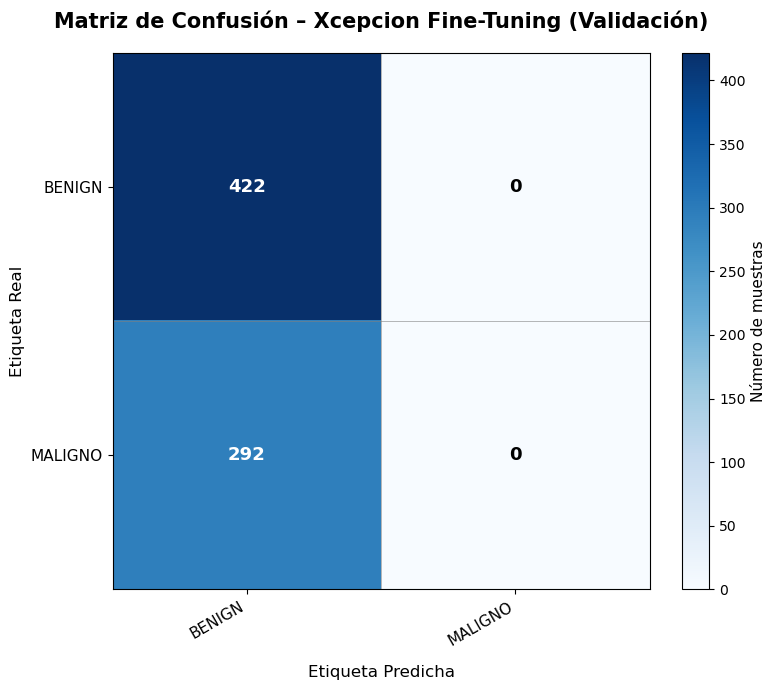

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# =========================
# Predicciones en validación (Fine-Tuning)
# =========================
y_pred_probs = model.predict(val_ds)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = val_ds.classes

# Nombres de clases en español
target_names = [
    "BENIGN",
    #"BENIGN_SIN_CALLBACK",
    "MALIGNO"
]

print("Class indices:", val_ds.class_indices)

# =========================
# Reporte de clasificación
# =========================
print("\nReporte de Clasificación (Validación - Fine-Tuning)\n")
print(classification_report(
    y_true,
    y_pred,
    target_names=target_names,
    digits=4,
    zero_division=0
))

# =========================
# Matriz de confusión
# =========================
cm = confusion_matrix(y_true, y_pred)

fig, ax = plt.subplots(figsize=(9,7))

im = ax.imshow(cm, cmap="Blues")

# Umbral dinámico para color del texto
threshold = cm.max() / 2

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(
            j, i, cm[i, j],
            ha="center",
            va="center",
            fontsize=13,
            fontweight="bold",
            color="white" if cm[i, j] > threshold else "black"
        )

# =========================
# Ticks y etiquetas
# =========================
ax.set_xticks(np.arange(len(target_names)))
ax.set_yticks(np.arange(len(target_names)))

ax.set_xticklabels(target_names, fontsize=11, rotation=30, ha="right")
ax.set_yticklabels(target_names, fontsize=11)

ax.set_xlabel("Etiqueta Predicha", fontsize=12, labelpad=12)
ax.set_ylabel("Etiqueta Real", fontsize=12)
ax.set_title("Matriz de Confusión – Xcepcion Fine-Tuning (Validación)", fontsize=15, fontweight="bold", pad=18)

# =========================
# Grid fino
# =========================
ax.set_xticks(np.arange(-0.5, len(target_names), 1), minor=True)
ax.set_yticks(np.arange(-0.5, len(target_names), 1), minor=True)
ax.grid(which="minor", color="gray", linestyle="-", linewidth=0.4)
ax.tick_params(which="minor", bottom=False, left=False)

# =========================
# Barra de color
# =========================
cbar = plt.colorbar(im, ax=ax, fraction=0.045, pad=0.04)
cbar.ax.tick_params(labelsize=10)
cbar.set_label("Número de muestras", fontsize=11)

# Ajuste final de layout
plt.subplots_adjust(bottom=0.25)
plt.tight_layout()
plt.show()


In [ ]:
#DESPUES FNE TUNING
# FASE 2: Fine Tuning
base_model.trainable = True

# Congelar capas iniciales (características generales)
for layer in base_model.layers[:100]:
    layer.trainable = False

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss="categorical_crossentropy",
    metrics=[
        "accuracy",
        tf.keras.metrics.Recall(name="recall_all_classes")
    ]
)


In [ ]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=5,
        restore_best_weights=True
    ),
    tf.keras.callbacks.ModelCheckpoint(
        filepath=os.path.join(MODEL_DIR, f"{MODEL_NAME}.keras"),
        monitor="val_loss",
        save_best_only=True
    )
]


In [ ]:


# Entrenamiento fine-tuning
history_finetune = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=15,
    callbacks=callbacks
)



Epoch 1/15
179/179 [==============================] - 14s 66ms/step - loss: 0.6662 - accuracy: 0.5890 - recall_all_classes: 0.5890 - val_loss: 0.6711 - val_accuracy: 0.5924 - val_recall_all_classes: 0.5924
Epoch 2/15
179/179 [==============================] - 11s 62ms/step - loss: 0.6695 - accuracy: 0.5957 - recall_all_classes: 0.5957 - val_loss: 0.6663 - val_accuracy: 0.5882 - val_recall_all_classes: 0.5882
Epoch 3/15
179/179 [==============================] - 11s 61ms/step - loss: 0.6711 - accuracy: 0.5932 - recall_all_classes: 0.5932 - val_loss: 0.6678 - val_accuracy: 0.5896 - val_recall_all_classes: 0.5896
Epoch 4/15
179/179 [==============================] - 12s 65ms/step - loss: 0.6663 - accuracy: 0.6002 - recall_all_classes: 0.6002 - val_loss: 0.6640 - val_accuracy: 0.5980 - val_recall_all_classes: 0.5980
Epoch 5/15
179/179 [==============================] - 11s 62ms/step - loss: 0.6661 - accuracy: 0.5943 - recall_all_classes: 0.5943 - val_loss: 0.6731 - val_accuracy: 0.5938 - v

45/45 [==============================] - 2s 33ms/step
Class indices: {'1': 0, '2': 1}

Reporte de Clasificación (Validación - Fine-Tuning)

              precision    recall  f1-score   support

      BENIGN     0.6022    0.9076    0.7240       422
     MALIGNO     0.5000    0.1336    0.2108       292

    accuracy                         0.5910       714
   macro avg     0.5511    0.5206    0.4674       714
weighted avg     0.5604    0.5910    0.5141       714



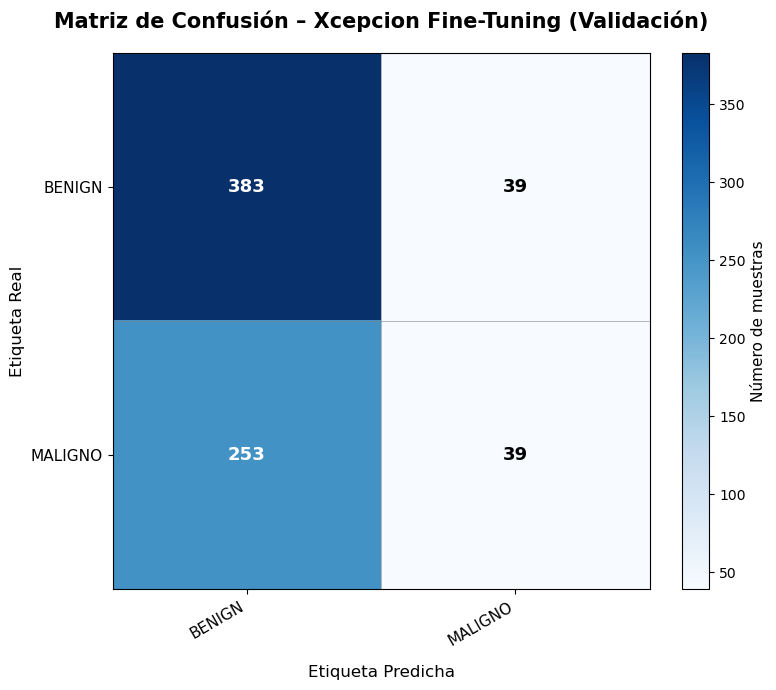

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# =========================
# Predicciones en validación (Fine-Tuning)
# =========================
y_pred_probs = model.predict(val_ds)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = val_ds.classes

# Nombres de clases en español
target_names = [
    "BENIGN",
    #"BENIGN_SIN_CALLBACK",
    "MALIGNO"
]

print("Class indices:", val_ds.class_indices)

# =========================
# Reporte de clasificación
# =========================
print("\nReporte de Clasificación (Validación - Fine-Tuning)\n")
print(classification_report(
    y_true,
    y_pred,
    target_names=target_names,
    digits=4,
    zero_division=0
))

# =========================
# Matriz de confusión
# =========================
cm = confusion_matrix(y_true, y_pred)

fig, ax = plt.subplots(figsize=(9,7))

im = ax.imshow(cm, cmap="Blues")

# Umbral dinámico para color del texto
threshold = cm.max() / 2

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(
            j, i, cm[i, j],
            ha="center",
            va="center",
            fontsize=13,
            fontweight="bold",
            color="white" if cm[i, j] > threshold else "black"
        )

# =========================
# Ticks y etiquetas
# =========================
ax.set_xticks(np.arange(len(target_names)))
ax.set_yticks(np.arange(len(target_names)))

ax.set_xticklabels(target_names, fontsize=11, rotation=30, ha="right")
ax.set_yticklabels(target_names, fontsize=11)

ax.set_xlabel("Etiqueta Predicha", fontsize=12, labelpad=12)
ax.set_ylabel("Etiqueta Real", fontsize=12)
ax.set_title("Matriz de Confusión – Xcepcion Fine-Tuning (Validación)", fontsize=15, fontweight="bold", pad=18)

# =========================
# Grid fino
# =========================
ax.set_xticks(np.arange(-0.5, len(target_names), 1), minor=True)
ax.set_yticks(np.arange(-0.5, len(target_names), 1), minor=True)
ax.grid(which="minor", color="gray", linestyle="-", linewidth=0.4)
ax.tick_params(which="minor", bottom=False, left=False)

# =========================
# Barra de color
# =========================
cbar = plt.colorbar(im, ax=ax, fraction=0.045, pad=0.04)
cbar.ax.tick_params(labelsize=10)
cbar.set_label("Número de muestras", fontsize=11)

# Ajuste final de layout
plt.subplots_adjust(bottom=0.25)
plt.tight_layout()
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import os

TARGET_SIZE = (512, 512)   # 🔴 NO se redimensiona
BATCH_SIZE = 8             # Recomendado bajar batch con 512
EPOCHS = 30
NUM_CLASSES = 2

COL_IMAGE = "image file path"
COL_LABEL = "Label"

MODEL_NAME = "XCEPCION_PRUEBA_DE_RESNET_CBISDDSM_512_v1"
MODEL_DIR = r"C:\Users\juanh\Desktop\carpeta_final_cancer_de_mama\PROYECTO_COPIA_IMAGENES_REDIMENCION_ANTES_SIN_USO_prueba_1024\MODELOS"
os.makedirs(MODEL_DIR, exist_ok=True)


In [ ]:

TRAIN_CSV_FILES = [
    r"C:\Users\juanh\Desktop\carpeta_final_cancer_de_mama\PROYECTO_COPIA_IMAGENES_REDIMENCION_ANTES_SIN_USO_prueba_1024\calc_case_description_train_set.csv",
    r"C:\Users\juanh\Desktop\carpeta_final_cancer_de_mama\PROYECTO_COPIA_IMAGENES_REDIMENCION_ANTES_SIN_USO_prueba_1024\mass_case_description_train_set.csv",
]

TEST_CSV_FILES = [
    r"C:\Users\juanh\Desktop\carpeta_final_cancer_de_mama\PROYECTO_COPIA_IMAGENES_REDIMENCION_ANTES_SIN_USO_prueba_1024\calc_case_description_test_set.csv",
    r"C:\Users\juanh\Desktop\carpeta_final_cancer_de_mama\PROYECTO_COPIA_IMAGENES_REDIMENCION_ANTES_SIN_USO_prueba_1024\mass_case_description_test_set.csv",
]



In [ ]:

train_df = pd.concat([pd.read_csv(p) for p in TRAIN_CSV_FILES], ignore_index=True)
test_df  = pd.concat([pd.read_csv(p) for p in TEST_CSV_FILES], ignore_index=True)

train_df[COL_LABEL] = train_df[COL_LABEL].astype(str)
test_df[COL_LABEL]  = test_df[COL_LABEL].astype(str)

print("Train total:", train_df.shape)
print("Test total :", test_df.shape)



Train total: (2864, 3)
Test total : (704, 3)


In [ ]:


train_df = train_df[train_df[COL_IMAGE].apply(os.path.exists)]
test_df  = test_df[test_df[COL_IMAGE].apply(os.path.exists)]

print("Train válidos:", train_df.shape)
print("Test válidos :", test_df.shape)

print("\nDistribución TRAIN:")
print(train_df[COL_LABEL].value_counts())

print("\nDistribución TEST:")
print(test_df[COL_LABEL].value_counts())


Train válidos: (2864, 3)
Test válidos : (704, 3)

Distribución TRAIN:
Label
1    1683
2    1181
Name: count, dtype: int64

Distribución TEST:
Label
1    428
2    276
Name: count, dtype: int64


In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_df, val_df = train_test_split(
    train_df,
    test_size=0.2,
    stratify=train_df[COL_LABEL],
    random_state=42
)

print("Train:", train_df.shape)
print("Validation:", val_df.shape)



Train: (2291, 3)
Validation: (573, 3)


In [ ]:
train_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet.preprocess_input,
    rotation_range=15,
    width_shift_range=0.05,
    height_shift_range=0.05,
    zoom_range=0.1,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet.preprocess_input
)


In [ ]:

train_ds = train_datagen.flow_from_dataframe(
    train_df,
    x_col=COL_IMAGE,
    y_col=COL_LABEL,
    target_size=TARGET_SIZE,
    color_mode="rgb",
    class_mode="categorical",
    batch_size=BATCH_SIZE,
    shuffle=True
)

val_ds = val_datagen.flow_from_dataframe(
    val_df,
    x_col=COL_IMAGE,
    y_col=COL_LABEL,
    target_size=TARGET_SIZE,
    color_mode="rgb",
    class_mode="categorical",
    batch_size=BATCH_SIZE,
    shuffle=False
)

test_ds = val_datagen.flow_from_dataframe(
    test_df,
    x_col=COL_IMAGE,
    y_col=COL_LABEL,
    target_size=TARGET_SIZE,
    color_mode="rgb",
    class_mode="categorical",
    batch_size=BATCH_SIZE,
    shuffle=False
)





Found 2291 validated image filenames belonging to 2 classes.
Found 573 validated image filenames belonging to 2 classes.
Found 704 validated image filenames belonging to 2 classes.


In [ ]:
def gray_to_rgb(x):
    return layers.Lambda(lambda x: tf.image.grayscale_to_rgb(x))(x)

# =========================
# Modelo base Xception
# =========================
base_model = tf.keras.applications.Xception(
    include_top=False,
    weights="imagenet",
    input_shape=(512, 512, 3)
)
base_model.trainable = True  # congelado en la primera fase

# =========================
# Modelo completo
# =========================
inputs = layers.Input(shape=(512, 512, 1))  # imágenes en escala de grises
x = gray_to_rgb(inputs)                     # conversión a RGB
x = tf.keras.applications.xception.preprocess_input(x)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.4)(x)
outputs = layers.Dense(NUM_CLASSES, activation="softmax")(x)

model = models.Model(inputs, outputs)
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 512, 512, 1)]     0         
                                                                 
 lambda (Lambda)             (None, 512, 512, 3)       0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 512, 512, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 512, 512, 3)      0         
 a)                                                              
                                                                 
 xception (Functional)       (None, 16, 16, 2048)      20861480  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0     

In [ ]:


model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)



In [ ]:

callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=5,
        restore_best_weights=True
    ),
    tf.keras.callbacks.ModelCheckpoint(
        filepath=os.path.join(MODEL_DIR, f"{MODEL_NAME}.keras"),
        monitor="val_loss",
        save_best_only=True
    )
]


In [ ]:

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    callbacks=callbacks
)


Epoch 1/30


InvalidArgumentError: Graph execution error:

Detected at node 'model/lambda/grayscale_to_rgb/assert_equal_1/Assert/Assert' defined at (most recent call last):
    File "C:\Users\juanh\anaconda3\envs\py310\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\juanh\anaconda3\envs\py310\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "C:\Users\juanh\anaconda3\envs\py310\lib\site-packages\ipykernel_launcher.py", line 18, in <module>
      app.launch_new_instance()
    File "C:\Users\juanh\anaconda3\envs\py310\lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
      app.start()
    File "C:\Users\juanh\anaconda3\envs\py310\lib\site-packages\ipykernel\kernelapp.py", line 739, in start
      self.io_loop.start()
    File "C:\Users\juanh\anaconda3\envs\py310\lib\site-packages\tornado\platform\asyncio.py", line 211, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\juanh\anaconda3\envs\py310\lib\asyncio\base_events.py", line 603, in run_forever
      self._run_once()
    File "C:\Users\juanh\anaconda3\envs\py310\lib\asyncio\base_events.py", line 1909, in _run_once
      handle._run()
    File "C:\Users\juanh\anaconda3\envs\py310\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\juanh\anaconda3\envs\py310\lib\site-packages\ipykernel\kernelbase.py", line 519, in dispatch_queue
      await self.process_one()
    File "C:\Users\juanh\anaconda3\envs\py310\lib\site-packages\ipykernel\kernelbase.py", line 508, in process_one
      await dispatch(*args)
    File "C:\Users\juanh\anaconda3\envs\py310\lib\site-packages\ipykernel\kernelbase.py", line 400, in dispatch_shell
      await result
    File "C:\Users\juanh\anaconda3\envs\py310\lib\site-packages\ipykernel\ipkernel.py", line 368, in execute_request
      await super().execute_request(stream, ident, parent)
    File "C:\Users\juanh\anaconda3\envs\py310\lib\site-packages\ipykernel\kernelbase.py", line 767, in execute_request
      reply_content = await reply_content
    File "C:\Users\juanh\anaconda3\envs\py310\lib\site-packages\ipykernel\ipkernel.py", line 455, in do_execute
      res = shell.run_cell(
    File "C:\Users\juanh\anaconda3\envs\py310\lib\site-packages\ipykernel\zmqshell.py", line 602, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\juanh\anaconda3\envs\py310\lib\site-packages\IPython\core\interactiveshell.py", line 3075, in run_cell
      result = self._run_cell(
    File "C:\Users\juanh\anaconda3\envs\py310\lib\site-packages\IPython\core\interactiveshell.py", line 3130, in _run_cell
      result = runner(coro)
    File "C:\Users\juanh\anaconda3\envs\py310\lib\site-packages\IPython\core\async_helpers.py", line 128, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\juanh\anaconda3\envs\py310\lib\site-packages\IPython\core\interactiveshell.py", line 3334, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\juanh\anaconda3\envs\py310\lib\site-packages\IPython\core\interactiveshell.py", line 3517, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\juanh\anaconda3\envs\py310\lib\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\juanh\AppData\Local\Temp\ipykernel_29200\1913291510.py", line 1, in <module>
      history = model.fit(
    File "C:\Users\juanh\anaconda3\envs\py310\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\juanh\anaconda3\envs\py310\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\juanh\anaconda3\envs\py310\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "C:\Users\juanh\anaconda3\envs\py310\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\juanh\anaconda3\envs\py310\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "C:\Users\juanh\anaconda3\envs\py310\lib\site-packages\keras\engine\training.py", line 993, in train_step
      y_pred = self(x, training=True)
    File "C:\Users\juanh\anaconda3\envs\py310\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\juanh\anaconda3\envs\py310\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\juanh\anaconda3\envs\py310\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\juanh\anaconda3\envs\py310\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\juanh\anaconda3\envs\py310\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\juanh\anaconda3\envs\py310\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "C:\Users\juanh\anaconda3\envs\py310\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\juanh\anaconda3\envs\py310\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\juanh\anaconda3\envs\py310\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\juanh\anaconda3\envs\py310\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\juanh\anaconda3\envs\py310\lib\site-packages\keras\layers\core\lambda_layer.py", line 208, in call
      result = self.function(inputs, **kwargs)
    File "C:\Users\juanh\AppData\Local\Temp\ipykernel_29200\293711914.py", line 2, in <lambda>
      return layers.Lambda(lambda x: tf.image.grayscale_to_rgb(x))(x)
Node: 'model/lambda/grayscale_to_rgb/assert_equal_1/Assert/Assert'
Detected at node 'model/lambda/grayscale_to_rgb/assert_equal_1/Assert/Assert' defined at (most recent call last):
    File "C:\Users\juanh\anaconda3\envs\py310\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\juanh\anaconda3\envs\py310\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "C:\Users\juanh\anaconda3\envs\py310\lib\site-packages\ipykernel_launcher.py", line 18, in <module>
      app.launch_new_instance()
    File "C:\Users\juanh\anaconda3\envs\py310\lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
      app.start()
    File "C:\Users\juanh\anaconda3\envs\py310\lib\site-packages\ipykernel\kernelapp.py", line 739, in start
      self.io_loop.start()
    File "C:\Users\juanh\anaconda3\envs\py310\lib\site-packages\tornado\platform\asyncio.py", line 211, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\juanh\anaconda3\envs\py310\lib\asyncio\base_events.py", line 603, in run_forever
      self._run_once()
    File "C:\Users\juanh\anaconda3\envs\py310\lib\asyncio\base_events.py", line 1909, in _run_once
      handle._run()
    File "C:\Users\juanh\anaconda3\envs\py310\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\juanh\anaconda3\envs\py310\lib\site-packages\ipykernel\kernelbase.py", line 519, in dispatch_queue
      await self.process_one()
    File "C:\Users\juanh\anaconda3\envs\py310\lib\site-packages\ipykernel\kernelbase.py", line 508, in process_one
      await dispatch(*args)
    File "C:\Users\juanh\anaconda3\envs\py310\lib\site-packages\ipykernel\kernelbase.py", line 400, in dispatch_shell
      await result
    File "C:\Users\juanh\anaconda3\envs\py310\lib\site-packages\ipykernel\ipkernel.py", line 368, in execute_request
      await super().execute_request(stream, ident, parent)
    File "C:\Users\juanh\anaconda3\envs\py310\lib\site-packages\ipykernel\kernelbase.py", line 767, in execute_request
      reply_content = await reply_content
    File "C:\Users\juanh\anaconda3\envs\py310\lib\site-packages\ipykernel\ipkernel.py", line 455, in do_execute
      res = shell.run_cell(
    File "C:\Users\juanh\anaconda3\envs\py310\lib\site-packages\ipykernel\zmqshell.py", line 602, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\juanh\anaconda3\envs\py310\lib\site-packages\IPython\core\interactiveshell.py", line 3075, in run_cell
      result = self._run_cell(
    File "C:\Users\juanh\anaconda3\envs\py310\lib\site-packages\IPython\core\interactiveshell.py", line 3130, in _run_cell
      result = runner(coro)
    File "C:\Users\juanh\anaconda3\envs\py310\lib\site-packages\IPython\core\async_helpers.py", line 128, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\juanh\anaconda3\envs\py310\lib\site-packages\IPython\core\interactiveshell.py", line 3334, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\juanh\anaconda3\envs\py310\lib\site-packages\IPython\core\interactiveshell.py", line 3517, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\juanh\anaconda3\envs\py310\lib\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\juanh\AppData\Local\Temp\ipykernel_29200\1913291510.py", line 1, in <module>
      history = model.fit(
    File "C:\Users\juanh\anaconda3\envs\py310\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\juanh\anaconda3\envs\py310\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\juanh\anaconda3\envs\py310\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "C:\Users\juanh\anaconda3\envs\py310\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\juanh\anaconda3\envs\py310\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "C:\Users\juanh\anaconda3\envs\py310\lib\site-packages\keras\engine\training.py", line 993, in train_step
      y_pred = self(x, training=True)
    File "C:\Users\juanh\anaconda3\envs\py310\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\juanh\anaconda3\envs\py310\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\juanh\anaconda3\envs\py310\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\juanh\anaconda3\envs\py310\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\juanh\anaconda3\envs\py310\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\juanh\anaconda3\envs\py310\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "C:\Users\juanh\anaconda3\envs\py310\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\juanh\anaconda3\envs\py310\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\juanh\anaconda3\envs\py310\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\juanh\anaconda3\envs\py310\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\juanh\anaconda3\envs\py310\lib\site-packages\keras\layers\core\lambda_layer.py", line 208, in call
      result = self.function(inputs, **kwargs)
    File "C:\Users\juanh\AppData\Local\Temp\ipykernel_29200\293711914.py", line 2, in <lambda>
      return layers.Lambda(lambda x: tf.image.grayscale_to_rgb(x))(x)
Node: 'model/lambda/grayscale_to_rgb/assert_equal_1/Assert/Assert'
2 root error(s) found.
  (0) INVALID_ARGUMENT:  assertion failed: [Last dimension of a grayscale image should be size 1.] [Condition x == y did not hold element-wise:] [x (model/lambda/grayscale_to_rgb/strided_slice:0) = ] [3] [y (model/lambda/grayscale_to_rgb/assert_equal_1/y:0) = ] [1]
	 [[{{node model/lambda/grayscale_to_rgb/assert_equal_1/Assert/Assert}}]]
	 [[model/lambda/grayscale_to_rgb/assert_greater_equal/Assert/Assert/_29]]
  (1) INVALID_ARGUMENT:  assertion failed: [Last dimension of a grayscale image should be size 1.] [Condition x == y did not hold element-wise:] [x (model/lambda/grayscale_to_rgb/strided_slice:0) = ] [3] [y (model/lambda/grayscale_to_rgb/assert_equal_1/y:0) = ] [1]
	 [[{{node model/lambda/grayscale_to_rgb/assert_equal_1/Assert/Assert}}]]
0 successful operations.
0 derived errors ignored. [Op:__inference_train_function_11883]

# VGGNET16  CON IMAGENES 512 PX POR 512 PX

In [ ]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt


In [ ]:
# =========================
# Parámetros generales
# =========================
TARGET_SIZE = (512, 512)
BATCH_SIZE = 8
EPOCHS = 30
NUM_CLASSES = 2

COL_IMAGE = "image file path"
COL_LABEL = "Label"

MODEL_NAME = "VGG16_CBISDDSM_512_v1"
MODEL_DIR = r"C:\Users\juanh\Desktop\PROYECTO_VGG_MODELOS"
os.makedirs(MODEL_DIR, exist_ok=True)

# =========================
# CSVs de entrenamiento y prueba
# =========================C:\Users\juanh\Desktop\carpeta_final_cancer_de_mama\PROYECTO_COPIA_IMAGENES_REDIMENCION_ANTES_SIN_USO_prueba_1024\
TRAIN_CSV_FILES = [
    r"C:\Users\juanh\Desktop\carpeta_final_cancer_de_mama\PROYECTO_COPIA_IMAGENES_REDIMENCION_ANTES_SIN_USO_prueba_1024\calc_case_description_train_set.csv",
    r"C:\Users\juanh\Desktop\carpeta_final_cancer_de_mama\PROYECTO_COPIA_IMAGENES_REDIMENCION_ANTES_SIN_USO_prueba_1024\mass_case_description_train_set.csv",
]

TEST_CSV_FILES = [
    r"C:\Users\juanh\Desktop\carpeta_final_cancer_de_mama\PROYECTO_COPIA_IMAGENES_REDIMENCION_ANTES_SIN_USO_prueba_1024\calc_case_description_test_set.csv",
    r"C:\Users\juanh\Desktop\carpeta_final_cancer_de_mama\PROYECTO_COPIA_IMAGENES_REDIMENCION_ANTES_SIN_USO_prueba_1024\mass_case_description_test_set.csv",
]


In [ ]:
train_df = pd.concat([pd.read_csv(p) for p in TRAIN_CSV_FILES], ignore_index=True)
test_df  = pd.concat([pd.read_csv(p) for p in TEST_CSV_FILES], ignore_index=True)

train_df[COL_LABEL] = train_df[COL_LABEL].astype(str)
test_df[COL_LABEL]  = test_df[COL_LABEL].astype(str)

# Verificar que existan las imágenes
train_df = train_df[train_df[COL_IMAGE].apply(os.path.exists)]
test_df  = test_df[test_df[COL_IMAGE].apply(os.path.exists)]

# Split train/validation
train_df, val_df = train_test_split(
    train_df,
    test_size=0.2,
    stratify=train_df[COL_LABEL],
    random_state=42
)

print("Train:", train_df.shape)
print("Validation:", val_df.shape)
print("Test:", test_df.shape)


Train: (2291, 3)
Validation: (573, 3)
Test: (704, 3)


In [ ]:
train_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input,
    rotation_range=15,
    width_shift_range=0.05,
    height_shift_range=0.05,
    zoom_range=0.1,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input
)

train_ds = train_datagen.flow_from_dataframe(
    train_df,
    x_col=COL_IMAGE,
    y_col=COL_LABEL,
    target_size=TARGET_SIZE,
    color_mode="rgb",
    class_mode="categorical",
    batch_size=BATCH_SIZE,
    shuffle=True
)

val_ds = val_datagen.flow_from_dataframe(
    val_df,
    x_col=COL_IMAGE,
    y_col=COL_LABEL,
    target_size=TARGET_SIZE,
    color_mode="rgb",
    class_mode="categorical",
    batch_size=BATCH_SIZE,
    shuffle=False
)

test_ds = val_datagen.flow_from_dataframe(
    test_df,
    x_col=COL_IMAGE,
    y_col=COL_LABEL,
    target_size=TARGET_SIZE,
    color_mode="rgb",
    class_mode="categorical",
    batch_size=BATCH_SIZE,
    shuffle=False
)


Found 2291 validated image filenames belonging to 2 classes.
Found 573 validated image filenames belonging to 2 classes.
Found 704 validated image filenames belonging to 2 classes.


In [ ]:
base_model = VGG16(
    include_top=False,
    weights="imagenet",
    input_shape=(512, 512, 3)
)
base_model.trainable = False

inputs = layers.Input(shape=(512, 512, 3))
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(NUM_CLASSES, activation="softmax")(x)

model = models.Model(inputs, outputs)
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)
model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 512, 512, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 16, 16, 512)       14714688  
                                                                 
 global_average_pooling2d_1   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 2)                 514       
                                                           

In [ ]:
callbacks = [
    EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True),
    ModelCheckpoint(
        filepath=os.path.join(MODEL_DIR, f"{MODEL_NAME}.keras"),
        monitor="val_loss",
        save_best_only=True
    )
]



In [ ]:


history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    callbacks=callbacks
)

Epoch 1/30
287/287 [==============================] - 71s 236ms/step - loss: 0.7730 - accuracy: 0.5674 - val_loss: 0.6477 - val_accuracy: 0.6300
Epoch 2/30
287/287 [==============================] - 65s 226ms/step - loss: 0.6841 - accuracy: 0.6146 - val_loss: 0.6337 - val_accuracy: 0.6143
Epoch 3/30
287/287 [==============================] - 66s 228ms/step - loss: 0.6535 - accuracy: 0.6264 - val_loss: 0.6328 - val_accuracy: 0.6248
Epoch 4/30
287/287 [==============================] - 66s 231ms/step - loss: 0.6313 - accuracy: 0.6425 - val_loss: 0.6319 - val_accuracy: 0.6108
Epoch 5/30
287/287 [==============================] - 65s 227ms/step - loss: 0.6086 - accuracy: 0.6635 - val_loss: 0.6222 - val_accuracy: 0.6283
Epoch 6/30
287/287 [==============================] - 65s 226ms/step - loss: 0.6262 - accuracy: 0.6451 - val_loss: 0.6186 - val_accuracy: 0.6335
Epoch 7/30
287/287 [==============================] - 65s 225ms/step - loss: 0.6045 - accuracy: 0.6622 - val_loss: 0.6206 - val_ac

72/72 [==============================] - 6s 77ms/step
Índices de clase: {'1': 0, '2': 1}

Reporte de Clasificación (Validación)

              precision    recall  f1-score   support

     BENIGNO     0.6972    0.8131    0.7507       337
     MALIGNO     0.6500    0.4958    0.5625       236

    accuracy                         0.6824       573
   macro avg     0.6736    0.6544    0.6566       573
weighted avg     0.6778    0.6824    0.6732       573



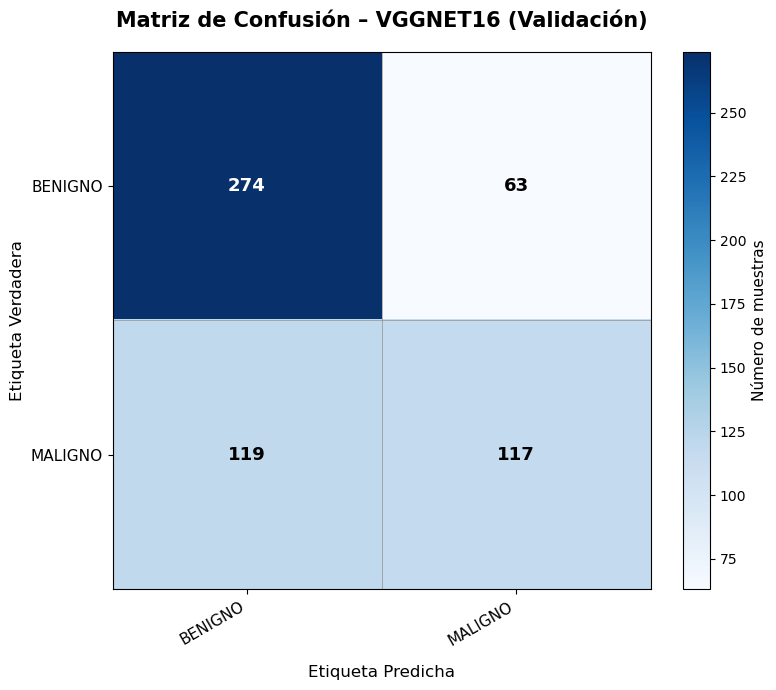

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# =========================
# Predicciones VALIDACIÓN
# =========================
y_pred_probs = model.predict(val_ds, verbose=1)
y_pred = np.argmax(y_pred_probs, axis=1)

# Clases reales desde el generator
y_true = val_ds.classes

# Mapeo de clases
target_names = [
    "BENIGNO",
    #"BENIGNO_SIN_CALLBACK",
    "MALIGNO"
]

print("Índices de clase:", val_ds.class_indices)

# =========================
# Reporte de clasificación
# =========================
print("\nReporte de Clasificación (Validación)\n")
print(
    classification_report(
        y_true,
        y_pred,
        target_names=target_names,
        digits=4,
        zero_division=0
    )
)

# =========================
# Matriz de confusión
# =========================
cm = confusion_matrix(y_true, y_pred)

fig, ax = plt.subplots(figsize=(9, 7))
im = ax.imshow(cm, cmap="Blues")

# Umbral dinámico para el color del texto
threshold = cm.max() / 2

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(
            j, i, cm[i, j],
            ha="center",
            va="center",
            fontsize=13,
            fontweight="bold",
            color="white" if cm[i, j] > threshold else "black"
        )

# =========================
# Etiquetas y ticks
# =========================
ax.set_xticks(np.arange(len(target_names)))
ax.set_yticks(np.arange(len(target_names)))

ax.set_xticklabels(
    target_names,
    fontsize=11,
    rotation=30,
    ha="right"
)

ax.set_yticklabels(
    target_names,
    fontsize=11
)

ax.set_xlabel("Etiqueta Predicha", fontsize=12, labelpad=12)
ax.set_ylabel("Etiqueta Verdadera", fontsize=12)
ax.set_title(
    "Matriz de Confusión – VGGNET16 (Validación)",
    fontsize=15,
    fontweight="bold",
    pad=18
)

# =========================
# Grid fino
# =========================
ax.set_xticks(np.arange(-0.5, len(target_names), 1), minor=True)
ax.set_yticks(np.arange(-0.5, len(target_names), 1), minor=True)

ax.grid(
    which="minor",
    color="gray",
    linestyle="-",
    linewidth=0.4
)
ax.tick_params(which="minor", bottom=False, left=False)

# =========================
# Barra de color
# =========================
cbar = plt.colorbar(im, ax=ax, fraction=0.045, pad=0.04)
cbar.ax.tick_params(labelsize=10)
cbar.set_label("Número de muestras", fontsize=11)

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import numpy as np

# =========================
# Binarización One-vs-Rest
# =========================
y_true_bin = label_binarize(y_true, classes=[0,1, 2])

# =========================
# Cálculo de AUC por clase
# =========================
print("\nMÉTRICAS ROC / AUC POR CLASE (One-vs-Rest)\n")

auc_scores = {}

for i, name in enumerate(target_names):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_probs[:, i])
    roc_auc = auc(fpr, tpr)
    auc_scores[name] = roc_auc

    print(f"Clase: {name}")
    print(f"  AUC: {roc_auc:.4f}")
    print("=" * 35)

# =========================
# AUC promedio
# =========================
macro_auc = np.mean(list(auc_scores.values()))
print(f"\nAUC promedio (macro): {macro_auc:.4f}")




MÉTRICAS ROC / AUC POR CLASE (One-vs-Rest)

Clase: BENIGNO
  AUC: 0.7592
Clase: MALIGNO
  AUC: 0.7592

AUC promedio (macro): 0.7592


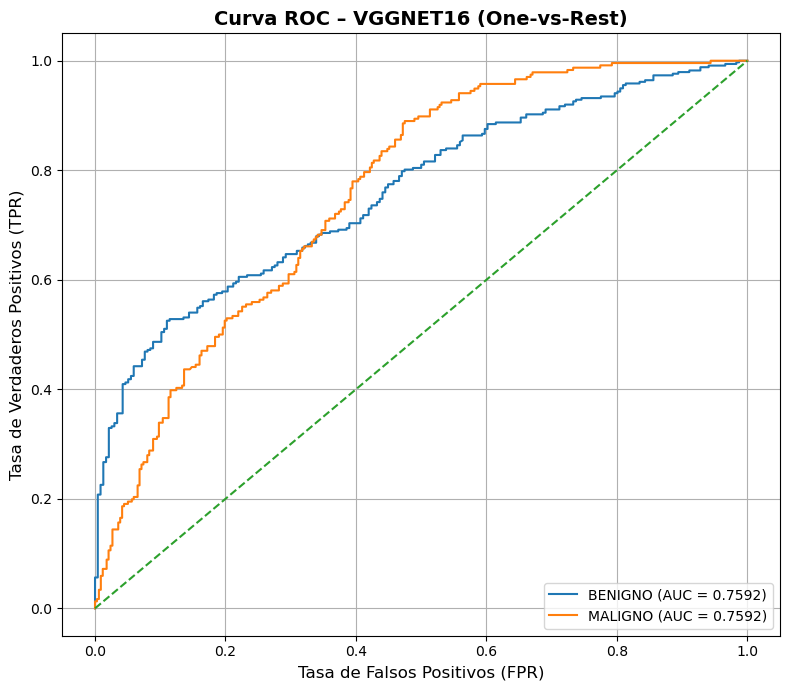

In [ ]:

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# =========================
# Binarización One-vs-Rest
# =========================
y_true_bin = label_binarize(y_true, classes=[0, 1, 2])

plt.figure(figsize=(8, 7))

for i, name in enumerate(target_names):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(
        fpr,
        tpr,
        label=f"{name} (AUC = {roc_auc:.4f})"
    )

# Línea diagonal (clasificador aleatorio)
plt.plot([0, 1], [0, 1], linestyle="--")

# =========================
# Etiquetas en español
# =========================
plt.xlabel("Tasa de Falsos Positivos (FPR)", fontsize=12)
plt.ylabel("Tasa de Verdaderos Positivos (TPR)", fontsize=12)
plt.title("Curva ROC – VGGNET16 (One-vs-Rest)", fontsize=14, fontweight="bold")

plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Descongelar últimas capas convolucionales de VGG16 (ejemplo: conv5_block)
for layer in base_model.layers[-4:]:
    layer.trainable = True

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


In [ ]:
## UNA HORA
history_finetune = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30,
    callbacks=callbacks
)

Epoch 1/30
287/287 [==============================] - 66s 226ms/step - loss: 0.5060 - accuracy: 0.7447 - val_loss: 0.5659 - val_accuracy: 0.6684
Epoch 2/30
287/287 [==============================] - 65s 225ms/step - loss: 0.5041 - accuracy: 0.7525 - val_loss: 0.5658 - val_accuracy: 0.6649
Epoch 3/30
287/287 [==============================] - 64s 224ms/step - loss: 0.5094 - accuracy: 0.7368 - val_loss: 0.5641 - val_accuracy: 0.6736
Epoch 4/30
287/287 [==============================] - 62s 215ms/step - loss: 0.5047 - accuracy: 0.7464 - val_loss: 0.5646 - val_accuracy: 0.6667
Epoch 5/30
287/287 [==============================] - 63s 218ms/step - loss: 0.5062 - accuracy: 0.7455 - val_loss: 0.5679 - val_accuracy: 0.6684
Epoch 6/30
287/287 [==============================] - 63s 218ms/step - loss: 0.4933 - accuracy: 0.7516 - val_loss: 0.5649 - val_accuracy: 0.6649
Epoch 7/30
287/287 [==============================] - 65s 225ms/step - loss: 0.5036 - accuracy: 0.7403 - val_loss: 0.5630 - val_ac

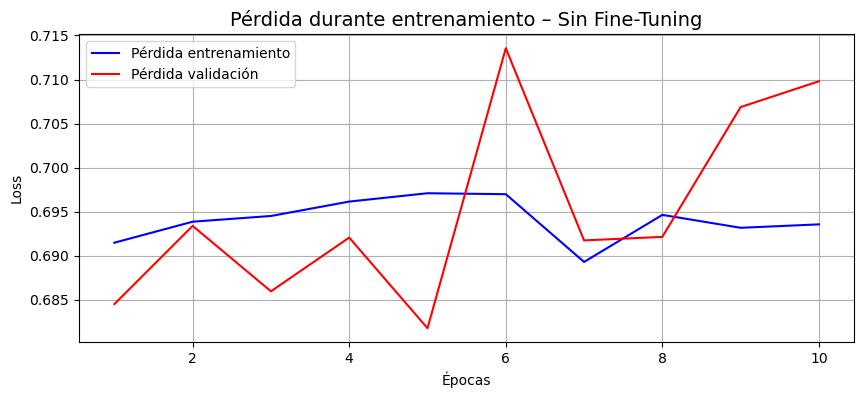

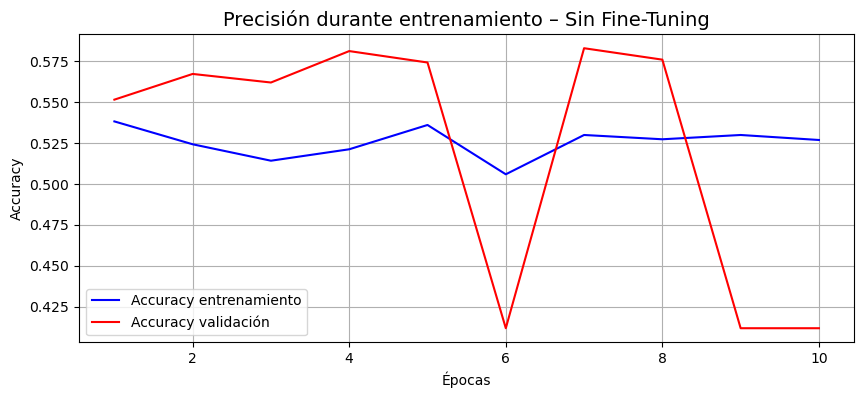

In [ ]:
# =========================
# Visualización de entrenamiento (sin fine-tuning)
# =========================
import matplotlib.pyplot as plt

# history_head es el objeto retornado por model.fit
loss_train = history_head.history['loss']
loss_val = history_head.history['val_loss']

acc_train = history_head.history['accuracy']
acc_val = history_head.history['val_accuracy']

epochs = range(1, len(loss_train) + 1)

# =========================
# Pérdida
# =========================
plt.figure(figsize=(10,4))
plt.plot(epochs, loss_train, 'b-', label='Pérdida entrenamiento')
plt.plot(epochs, loss_val, 'r-', label='Pérdida validación')
plt.title('Pérdida durante entrenamiento – Sin Fine-Tuning', fontsize=14)
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# =========================
# Accuracy
# =========================
plt.figure(figsize=(10,4))
plt.plot(epochs, acc_train, 'b-', label='Accuracy entrenamiento')
plt.plot(epochs, acc_val, 'r-', label='Accuracy validación')
plt.title('Precisión durante entrenamiento – Sin Fine-Tuning', fontsize=14)
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

72/72 [==============================] - 6s 78ms/step
Índices de clase: {'1': 0, '2': 1}

Reporte de Clasificación (Validación)

              precision    recall  f1-score   support

     BENIGNO     0.7205    0.7418    0.7310       337
     MALIGNO     0.6150    0.5890    0.6017       236

    accuracy                         0.6789       573
   macro avg     0.6678    0.6654    0.6664       573
weighted avg     0.6770    0.6789    0.6778       573



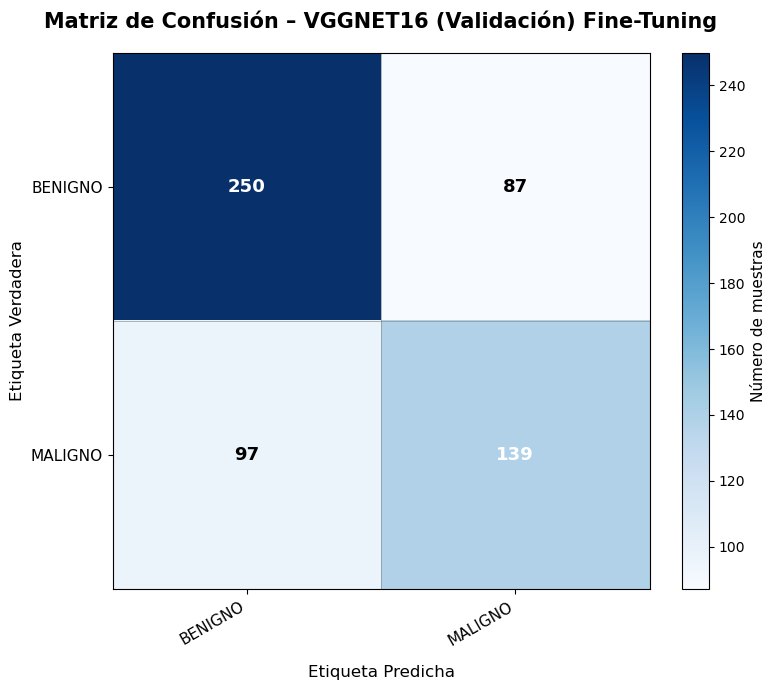

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# =========================
# Predicciones VALIDACIÓN
# =========================
y_pred_probs = model.predict(val_ds, verbose=1)
y_pred = np.argmax(y_pred_probs, axis=1)

# Clases reales desde el generator
y_true = val_ds.classes

# Mapeo de clases
target_names = [
    "BENIGNO",
    #"BENIGNO_SIN_CALLBACK",
    "MALIGNO"
]

print("Índices de clase:", val_ds.class_indices)

# =========================
# Reporte de clasificación
# =========================
print("\nReporte de Clasificación (Validación)\n")
print(
    classification_report(
        y_true,
        y_pred,
        target_names=target_names,
        digits=4,
        zero_division=0
    )
)

# =========================
# Matriz de confusión
# =========================
cm = confusion_matrix(y_true, y_pred)

fig, ax = plt.subplots(figsize=(9, 7))
im = ax.imshow(cm, cmap="Blues")

# Umbral dinámico para el color del texto
threshold = cm.max() / 2

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(
            j, i, cm[i, j],
            ha="center",
            va="center",
            fontsize=13,
            fontweight="bold",
            color="white" if cm[i, j] > threshold else "black"
        )

# =========================
# Etiquetas y ticks
# =========================
ax.set_xticks(np.arange(len(target_names)))
ax.set_yticks(np.arange(len(target_names)))

ax.set_xticklabels(
    target_names,
    fontsize=11,
    rotation=30,
    ha="right"
)

ax.set_yticklabels(
    target_names,
    fontsize=11
)

ax.set_xlabel("Etiqueta Predicha", fontsize=12, labelpad=12)
ax.set_ylabel("Etiqueta Verdadera", fontsize=12)
ax.set_title(
    "Matriz de Confusión – VGGNET16 (Validación) Fine-Tuning",
    fontsize=15,
    fontweight="bold",
    pad=18
)

# =========================
# Grid fino
# =========================
ax.set_xticks(np.arange(-0.5, len(target_names), 1), minor=True)
ax.set_yticks(np.arange(-0.5, len(target_names), 1), minor=True)

ax.grid(
    which="minor",
    color="gray",
    linestyle="-",
    linewidth=0.4
)
ax.tick_params(which="minor", bottom=False, left=False)

# =========================
# Barra de color
# =========================
cbar = plt.colorbar(im, ax=ax, fraction=0.045, pad=0.04)
cbar.ax.tick_params(labelsize=10)
cbar.set_label("Número de muestras", fontsize=11)

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import numpy as np

# =========================
# Binarización One-vs-Rest
# =========================
y_true_bin = label_binarize(y_true, classes=[0, 1, 2])

# =========================
# Cálculo de AUC por clase
# =========================
print("\nMÉTRICAS ROC / AUC POR CLASE (One-vs-Rest)\n")

auc_scores = {}

for i, name in enumerate(target_names):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_probs[:, i])
    roc_auc = auc(fpr, tpr)
    auc_scores[name] = roc_auc

    print(f"Clase: {name}")
    print(f"  AUC: {roc_auc:.4f}")
    print("-" * 35)

# =========================
# AUC promedio
# =========================
macro_auc = np.mean(list(auc_scores.values()))
print(f"\nAUC promedio (macro): {macro_auc:.4f}")




MÉTRICAS ROC / AUC POR CLASE (One-vs-Rest)

Clase: BENIGNO
  AUC: 0.7612
-----------------------------------
Clase: MALIGNO
  AUC: 0.7612
-----------------------------------

AUC promedio (macro): 0.7612


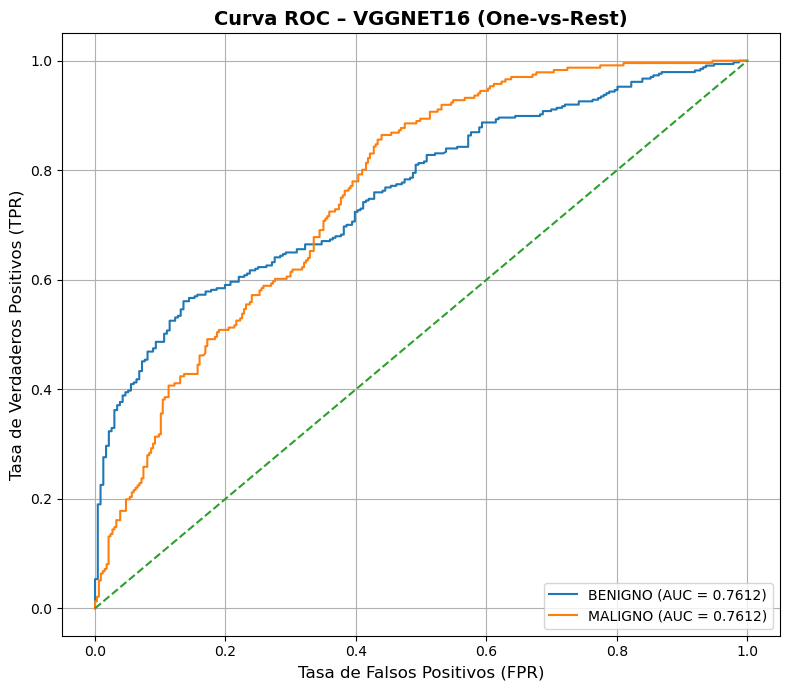

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# =========================
# Binarización One-vs-Rest
# =========================
y_true_bin = label_binarize(y_true, classes=[0, 1, 2])

plt.figure(figsize=(8, 7))

for i, name in enumerate(target_names):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(
        fpr,
        tpr,
        label=f"{name} (AUC = {roc_auc:.4f})"
    )

# Línea diagonal (clasificador aleatorio)
plt.plot([0, 1], [0, 1], linestyle="--")

# =========================
# Etiquetas en español
# =========================
plt.xlabel("Tasa de Falsos Positivos (FPR)", fontsize=12)
plt.ylabel("Tasa de Verdaderos Positivos (TPR)", fontsize=12)
plt.title("Curva ROC – VGGNET16 (One-vs-Rest)", fontsize=14, fontweight="bold")

plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
MODEL_DIR = r"C:\Users\juanh\Desktop\carpeta_final_cancer_de_mama\PROYECTO_COPIA_IMAGENES_REDIMENCION_ANTES_SIN_USO_prueba_1024\MODELOS"
MODEL_NAME = "VGG16_CBISDDSM_512_v1_FINE_TUNING_VGGNET16"

import os
os.makedirs(MODEL_DIR, exist_ok=True)

model.save(os.path.join(MODEL_DIR, f"{MODEL_NAME}.keras"))
print("Modelo guardado correctamente.")
import os
path_model = os.path.join(MODEL_DIR, f"{MODEL_NAME}.keras")
print(os.path.exists(path_model))


Modelo guardado correctamente.
True


# PRUEBA DESCONGELANDO  TODAS LAS CAPAS VGGNET DINE TUNING CONV 5

In [ ]:

#probar este ultimo
# Descongelar todas las capas del bloque 5
for layer in base_model.layers:
    if "block5" in layer.name:  # solo capas del bloque 5
        layer.trainable = True
    else:
        layer.trainable = False

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


In [ ]:

history_finetune = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30,
    callbacks=callbacks
)

Epoch 1/30
287/287 [==============================] - 65s 223ms/step - loss: 0.5081 - accuracy: 0.7394 - val_loss: 0.5674 - val_accuracy: 0.6736
Epoch 2/30
287/287 [==============================] - 64s 223ms/step - loss: 0.5063 - accuracy: 0.7447 - val_loss: 0.5665 - val_accuracy: 0.6684
Epoch 3/30
287/287 [==============================] - 64s 224ms/step - loss: 0.5000 - accuracy: 0.7442 - val_loss: 0.5664 - val_accuracy: 0.6702
Epoch 4/30
287/287 [==============================] - 63s 220ms/step - loss: 0.5025 - accuracy: 0.7508 - val_loss: 0.5647 - val_accuracy: 0.6719
Epoch 5/30
287/287 [==============================] - 63s 218ms/step - loss: 0.4980 - accuracy: 0.7447 - val_loss: 0.5631 - val_accuracy: 0.6736
Epoch 6/30
287/287 [==============================] - 62s 216ms/step - loss: 0.5015 - accuracy: 0.7516 - val_loss: 0.5633 - val_accuracy: 0.6789
Epoch 7/30
287/287 [==============================] - 63s 218ms/step - loss: 0.5012 - accuracy: 0.7490 - val_loss: 0.5631 - val_ac

72/72 [==============================] - 6s 78ms/step
Índices de clase: {'1': 0, '2': 1}

Reporte de Clasificación (Validación)

              precision    recall  f1-score   support

     BENIGNO     0.7275    0.7211    0.7243       337
     MALIGNO     0.6067    0.6144    0.6105       236

    accuracy                         0.6771       573
   macro avg     0.6671    0.6677    0.6674       573
weighted avg     0.6778    0.6771    0.6774       573



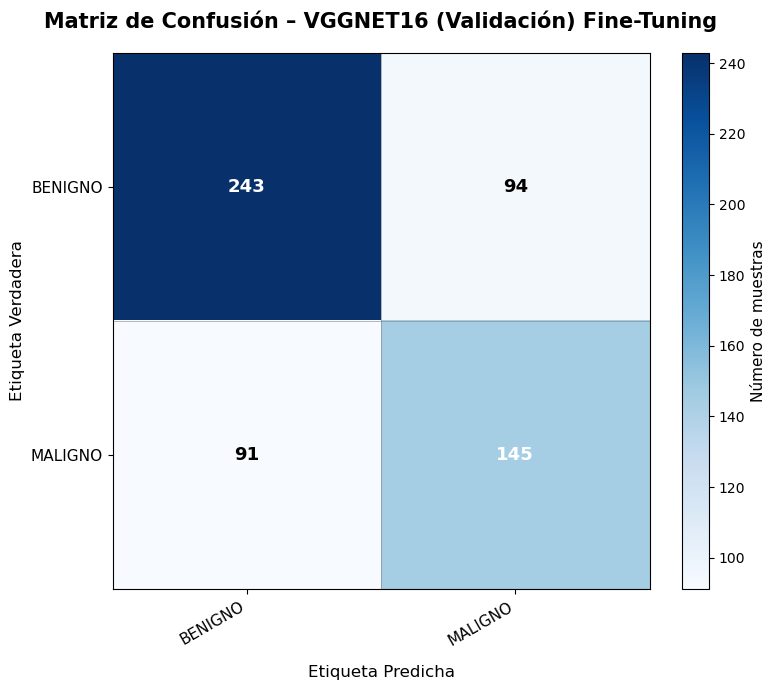

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# =========================
# Predicciones VALIDACIÓN
# =========================
y_pred_probs = model.predict(val_ds, verbose=1)
y_pred = np.argmax(y_pred_probs, axis=1)

# Clases reales desde el generator
y_true = val_ds.classes

# Mapeo de clases
target_names = [
    "BENIGNO",
    #"BENIGNO_SIN_CALLBACK",
    "MALIGNO"
]

print("Índices de clase:", val_ds.class_indices)

# =========================
# Reporte de clasificación
# =========================
print("\nReporte de Clasificación (Validación)\n")
print(
    classification_report(
        y_true,
        y_pred,
        target_names=target_names,
        digits=4,
        zero_division=0
    )
)

# =========================
# Matriz de confusión
# =========================
cm = confusion_matrix(y_true, y_pred)

fig, ax = plt.subplots(figsize=(9, 7))
im = ax.imshow(cm, cmap="Blues")

# Umbral dinámico para el color del texto
threshold = cm.max() / 2

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(
            j, i, cm[i, j],
            ha="center",
            va="center",
            fontsize=13,
            fontweight="bold",
            color="white" if cm[i, j] > threshold else "black"
        )

# =========================
# Etiquetas y ticks
# =========================
ax.set_xticks(np.arange(len(target_names)))
ax.set_yticks(np.arange(len(target_names)))

ax.set_xticklabels(
    target_names,
    fontsize=11,
    rotation=30,
    ha="right"
)

ax.set_yticklabels(
    target_names,
    fontsize=11
)

ax.set_xlabel("Etiqueta Predicha", fontsize=12, labelpad=12)
ax.set_ylabel("Etiqueta Verdadera", fontsize=12)
ax.set_title(
    "Matriz de Confusión – VGGNET16 (Validación) Fine-Tuning",
    fontsize=15,
    fontweight="bold",
    pad=18
)

# =========================
# Grid fino
# =========================
ax.set_xticks(np.arange(-0.5, len(target_names), 1), minor=True)
ax.set_yticks(np.arange(-0.5, len(target_names), 1), minor=True)

ax.grid(
    which="minor",
    color="gray",
    linestyle="-",
    linewidth=0.4
)
ax.tick_params(which="minor", bottom=False, left=False)

# =========================
# Barra de color
# =========================
cbar = plt.colorbar(im, ax=ax, fraction=0.045, pad=0.04)
cbar.ax.tick_params(labelsize=10)
cbar.set_label("Número de muestras", fontsize=11)

plt.tight_layout()
plt.show()

# Evaluación del modelo VGGNet-16 con Fine-Tuning

Con el objetivo de evaluar el desempeño del modelo **VGGNet-16** en la tarea de clasificación de imágenes mamográficas, se analizan las métricas obtenidas en el conjunto de validación tras aplicar **fine-tuning real**, es decir, descongelando las capas profundas del modelo para permitir el ajuste de los pesos al dominio médico específico.

---

## Desempeño del modelo

El modelo fue entrenado utilizando imágenes previamente preprocesadas y etiquetas correspondientes a dos clases: **BENIGNO** y **MALIGNO**. A continuación, se presentan los resultados obtenidos en la etapa de validación.

### Reporte de Clasificación (Validación)

| Clase     | Precision | Recall  | F1-score | Support |
|-----------|-----------|---------|----------|---------|
| BENIGNO   | 0.7275    | 0.7211  | 0.7243   | 337     |
| MALIGNO   | 0.6067    | 0.6144  | 0.6105   | 236     |
| **Accuracy global** |           |         | **0.6771** | 573 |
| **Macro avg** | 0.6671 | 0.6677 | 0.6674 | 573 |
| **Weighted avg** | 0.6778 | 0.6771 | 0.6774 | 573 |

---

## Análisis de resultados

El modelo VGGNet-16 con fine-tuning alcanza un **accuracy global del 67.71 %**, lo que indica una capacidad adecuada de clasificación considerando la complejidad del problema y el desbalance entre clases.

El **F1-score macro (0.6674)** evidencia un desempeño equilibrado entre ambas clases, evitando que el modelo favorezca de forma excesiva a la clase mayoritaria. De manera particular, el **recall de la clase MALIGNO (61.44 %)** resulta relevante desde el punto de vista clínico, ya que refleja la capacidad del modelo para identificar una proporción considerable de casos positivos.

Asimismo, la cercanía entre las métricas macro y weighted average sugiere que el modelo mantiene estabilidad en su aprendizaje y no presenta un sesgo significativo hacia una sola clase.

---

## Justificación del uso de Fine-Tuning

La elección del modelo **VGGNet-16 con fine-tuning** se fundamenta en que la descongelación de las capas profundas permite que la red ajuste representaciones de alto nivel a patrones específicos de las imágenes mamográficas, los cuales difieren sustancialmente de los datos genéricos utilizados durante el preentrenamiento.

Este proceso mejora la capacidad del modelo para capturar características clínicas relevantes, como texturas, bordes y variaciones estructurales asociadas a lesiones malignas, lo que se refleja en un desempeño más balanceado y consistente.

---

## Conclusión

En conclusión, el modelo **VGGNet-16 con fine-tuning** demuestra un desempeño sólido y estable en la clasificación de imágenes mamográficas, con métricas equilibradas entre clases y una capacidad adecuada para la detección de casos malignos. Por estas razones, este modelo se selecciona como la arquitectura final para el desarrollo del sistema de clasificación propuesto.


# Resnet50
ResNet-50
50
~25 M entrenamiento 25 millones de imagenes
Punto óptimo a comparacion de otras versiones del Resnet

In [ ]:
#pip install pandas
#!pip install scikit-learn
#!pip install Pillow
#python -m pip install tensorflow==2.10.0
#python -m pip install numpy==1.23.5
#python -m pip install pillow==9.5.0
#python -m pip install pandas scikit-learn


SyntaxError: invalid syntax (260213800.py, line 6)

# PRUEBA RESNET-50 NUMERO 3 CON IMAGENES A 512 PX

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
TARGET_SIZE = (512, 512)   # 🔴 NO se redimensiona
BATCH_SIZE = 8             # Recomendado bajar batch con 512
EPOCHS = 30
NUM_CLASSES = 2

COL_IMAGE = "image file path"
COL_LABEL = "Label"

MODEL_NAME = "RESNET50_CBISDDSM_512_v1"
MODEL_DIR = r"C:\Users\juanh\Desktop\carpeta_final_cancer_de_mama\PROYECTO_COPIA_IMAGENES_REDIMENCION_ANTES_SIN_USO_prueba_1024\MODELOS"
os.makedirs(MODEL_DIR, exist_ok=True)


In [ ]:
TRAIN_CSV_FILES = [
    r"C:\Users\juanh\Desktop\carpeta_final_cancer_de_mama\PROYECTO_COPIA_IMAGENES_REDIMENCION_ANTES_SIN_USO_prueba_1024\calc_case_description_train_set.csv",
    r"C:\Users\juanh\Desktop\carpeta_final_cancer_de_mama\PROYECTO_COPIA_IMAGENES_REDIMENCION_ANTES_SIN_USO_prueba_1024\mass_case_description_train_set.csv",
]

TEST_CSV_FILES = [
    r"C:\Users\juanh\Desktop\carpeta_final_cancer_de_mama\PROYECTO_COPIA_IMAGENES_REDIMENCION_ANTES_SIN_USO_prueba_1024\calc_case_description_test_set.csv",
    r"C:\Users\juanh\Desktop\carpeta_final_cancer_de_mama\PROYECTO_COPIA_IMAGENES_REDIMENCION_ANTES_SIN_USO_prueba_1024\mass_case_description_test_set.csv",
]


In [ ]:
train_df = pd.concat([pd.read_csv(p) for p in TRAIN_CSV_FILES], ignore_index=True)
test_df  = pd.concat([pd.read_csv(p) for p in TEST_CSV_FILES], ignore_index=True)

train_df[COL_LABEL] = train_df[COL_LABEL].astype(str)
test_df[COL_LABEL]  = test_df[COL_LABEL].astype(str)

print("Train total:", train_df.shape)
print("Test total :", test_df.shape)


Train total: (2864, 3)
Test total : (704, 3)


In [ ]:
train_df = train_df[train_df[COL_IMAGE].apply(os.path.exists)]
test_df  = test_df[test_df[COL_IMAGE].apply(os.path.exists)]

print("Train válidos:", train_df.shape)
print("Test válidos :", test_df.shape)

print("\nDistribución TRAIN:")
print(train_df[COL_LABEL].value_counts())

print("\nDistribución TEST:")
print(test_df[COL_LABEL].value_counts())


Train válidos: (2864, 3)
Test válidos : (704, 3)

Distribución TRAIN:
Label
1    1683
2    1181
Name: count, dtype: int64

Distribución TEST:
Label
1    428
2    276
Name: count, dtype: int64


In [ ]:
train_df, val_df = train_test_split(
    train_df,
    test_size=0.2,
    stratify=train_df[COL_LABEL],
    random_state=42
)

print("Train:", train_df.shape)
print("Validation:", val_df.shape)


Train: (2291, 3)
Validation: (573, 3)


In [ ]:
train_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet.preprocess_input,
    rotation_range=15,
    width_shift_range=0.05,
    height_shift_range=0.05,
    zoom_range=0.1,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet.preprocess_input
)


In [ ]:
train_ds = train_datagen.flow_from_dataframe(
    train_df,
    x_col=COL_IMAGE,
    y_col=COL_LABEL,
    target_size=TARGET_SIZE,
    color_mode="rgb",
    class_mode="categorical",
    batch_size=BATCH_SIZE,
    shuffle=True
)

val_ds = val_datagen.flow_from_dataframe(
    val_df,
    x_col=COL_IMAGE,
    y_col=COL_LABEL,
    target_size=TARGET_SIZE,
    color_mode="rgb",
    class_mode="categorical",
    batch_size=BATCH_SIZE,
    shuffle=False
)

test_ds = val_datagen.flow_from_dataframe(
    test_df,
    x_col=COL_IMAGE,
    y_col=COL_LABEL,
    target_size=TARGET_SIZE,
    color_mode="rgb",
    class_mode="categorical",
    batch_size=BATCH_SIZE,
    shuffle=False
)



Found 2291 validated image filenames belonging to 2 classes.
Found 573 validated image filenames belonging to 2 classes.
Found 704 validated image filenames belonging to 2 classes.


In [ ]:
base_model = tf.keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
    input_shape=(512, 512, 3)
)

base_model.trainable = False


In [ ]:
inputs = layers.Input(shape=(512, 512, 3))
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(NUM_CLASSES, activation="softmax")(x)

model = models.Model(inputs, outputs)
model.summary()


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 512, 512, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 16, 16, 2048)      23587712  
                                                                 
 global_average_pooling2d_2   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_4 (Dense)             (None, 256)               524544    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 2)                 514       
                                                           

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)



In [ ]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=5,
        restore_best_weights=True
    ),
    tf.keras.callbacks.ModelCheckpoint(
        filepath=os.path.join(MODEL_DIR, f"{MODEL_NAME}.keras"),
        monitor="val_loss",
        save_best_only=True
    )
]


In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    callbacks=callbacks
)


Epoch 1/30
287/287 [==============================] - 66s 228ms/step - loss: 0.6962 - accuracy: 0.5949 - val_loss: 0.6419 - val_accuracy: 0.6056
Epoch 2/30
287/287 [==============================] - 64s 224ms/step - loss: 0.6482 - accuracy: 0.6207 - val_loss: 0.6096 - val_accuracy: 0.6928
Epoch 3/30
287/287 [==============================] - 64s 222ms/step - loss: 0.6204 - accuracy: 0.6556 - val_loss: 0.6074 - val_accuracy: 0.6702
Epoch 4/30
287/287 [==============================] - 65s 226ms/step - loss: 0.6101 - accuracy: 0.6622 - val_loss: 0.5906 - val_accuracy: 0.6684
Epoch 5/30
287/287 [==============================] - 65s 226ms/step - loss: 0.6034 - accuracy: 0.6600 - val_loss: 0.5795 - val_accuracy: 0.6806
Epoch 6/30
287/287 [==============================] - 65s 226ms/step - loss: 0.6004 - accuracy: 0.6739 - val_loss: 0.5893 - val_accuracy: 0.6562
Epoch 7/30
287/287 [==============================] - 65s 225ms/step - loss: 0.5898 - accuracy: 0.6801 - val_loss: 0.5865 - val_ac

72/72 [==============================] - 4s 54ms/step
Índices de clase: {'1': 0, '2': 1}

Reporte de Clasificación (Validación)

              precision    recall  f1-score   support

     BENIGNO     0.8565    0.5846    0.6949       337
     MALIGNO     0.5918    0.8602    0.7012       236

    accuracy                         0.6981       573
   macro avg     0.7242    0.7224    0.6980       573
weighted avg     0.7475    0.6981    0.6975       573



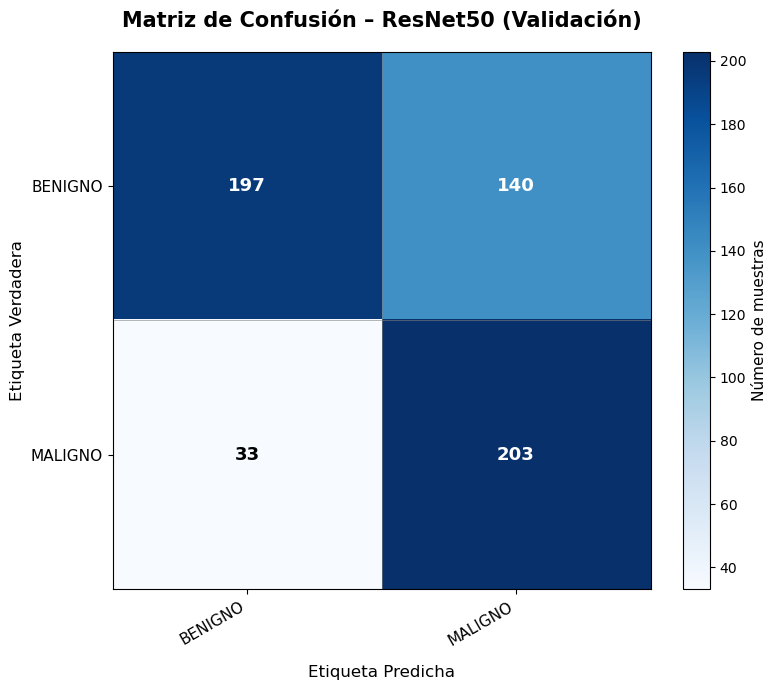

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# =========================
# Predicciones VALIDACIÓN
# =========================
y_pred_probs = model.predict(val_ds, verbose=1)
y_pred = np.argmax(y_pred_probs, axis=1)

# Clases reales desde el generator
y_true = val_ds.classes

# Mapeo de clases
target_names = [
    "BENIGNO",
    #"BENIGNO_SIN_CALLBACK",
    "MALIGNO"
]

print("Índices de clase:", val_ds.class_indices)

# =========================
# Reporte de clasificación
# =========================
print("\nReporte de Clasificación (Validación)\n")
print(
    classification_report(
        y_true,
        y_pred,
        target_names=target_names,
        digits=4,
        zero_division=0
    )
)

# =========================
# Matriz de confusión
# =========================
cm = confusion_matrix(y_true, y_pred)

fig, ax = plt.subplots(figsize=(9, 7))
im = ax.imshow(cm, cmap="Blues")

# Umbral dinámico para el color del texto
threshold = cm.max() / 2

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(
            j, i, cm[i, j],
            ha="center",
            va="center",
            fontsize=13,
            fontweight="bold",
            color="white" if cm[i, j] > threshold else "black"
        )

# =========================
# Etiquetas y ticks
# =========================
ax.set_xticks(np.arange(len(target_names)))
ax.set_yticks(np.arange(len(target_names)))

ax.set_xticklabels(
    target_names,
    fontsize=11,
    rotation=30,
    ha="right"
)

ax.set_yticklabels(
    target_names,
    fontsize=11
)

ax.set_xlabel("Etiqueta Predicha", fontsize=12, labelpad=12)
ax.set_ylabel("Etiqueta Verdadera", fontsize=12)
ax.set_title(
    "Matriz de Confusión – ResNet50 (Validación)",
    fontsize=15,
    fontweight="bold",
    pad=18
)

# =========================
# Grid fino
# =========================
ax.set_xticks(np.arange(-0.5, len(target_names), 1), minor=True)
ax.set_yticks(np.arange(-0.5, len(target_names), 1), minor=True)

ax.grid(
    which="minor",
    color="gray",
    linestyle="-",
    linewidth=0.4
)
ax.tick_params(which="minor", bottom=False, left=False)

# =========================
# Barra de color
# =========================
cbar = plt.colorbar(im, ax=ax, fraction=0.045, pad=0.04)
cbar.ax.tick_params(labelsize=10)
cbar.set_label("Número de muestras", fontsize=11)

plt.tight_layout()
plt.show()

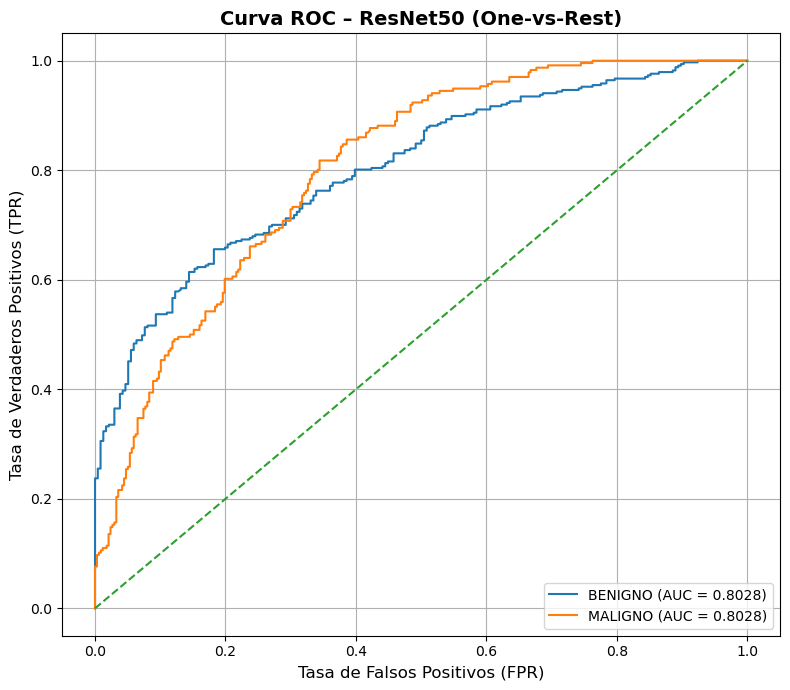

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# =========================
# Binarización One-vs-Rest
# =========================
y_true_bin = label_binarize(y_true, classes=[0, 1, 2])

plt.figure(figsize=(8, 7))

for i, name in enumerate(target_names):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(
        fpr,
        tpr,
        label=f"{name} (AUC = {roc_auc:.4f})"
    )

# Línea diagonal (clasificador aleatorio)
plt.plot([0, 1], [0, 1], linestyle="--")

# =========================
# Etiquetas en español
# =========================
plt.xlabel("Tasa de Falsos Positivos (FPR)", fontsize=12)
plt.ylabel("Tasa de Verdaderos Positivos (TPR)", fontsize=12)
plt.title("Curva ROC – ResNet50 (One-vs-Rest)", fontsize=14, fontweight="bold")

plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

## FINE TUNING 512 PX

In [ ]:
for layer in base_model.layers:
    if layer.name.startswith("conv5"):
        layer.trainable = True
    else:
        layer.trainable = False


In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


In [ ]:
history_finetune = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30,
    callbacks=callbacks
)


Epoch 1/30
287/287 [==============================] - 67s 227ms/step - loss: 0.4894 - accuracy: 0.7534 - val_loss: 0.5228 - val_accuracy: 0.7243
Epoch 2/30
287/287 [==============================] - 64s 224ms/step - loss: 0.4766 - accuracy: 0.7551 - val_loss: 0.5214 - val_accuracy: 0.7225
Epoch 3/30
287/287 [==============================] - 65s 227ms/step - loss: 0.4695 - accuracy: 0.7639 - val_loss: 0.5192 - val_accuracy: 0.7243
Epoch 4/30
287/287 [==============================] - 64s 224ms/step - loss: 0.4715 - accuracy: 0.7691 - val_loss: 0.5194 - val_accuracy: 0.7277
Epoch 5/30
287/287 [==============================] - 63s 221ms/step - loss: 0.4711 - accuracy: 0.7560 - val_loss: 0.5161 - val_accuracy: 0.7243
Epoch 6/30
287/287 [==============================] - 64s 222ms/step - loss: 0.4721 - accuracy: 0.7674 - val_loss: 0.5176 - val_accuracy: 0.7208
Epoch 7/30
287/287 [==============================] - 63s 219ms/step - loss: 0.4646 - accuracy: 0.7748 - val_loss: 0.5187 - val_ac

In [ ]:
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_acc:.4f}")



88/88 [==============================] - 9s 94ms/step - loss: 0.6035 - accuracy: 0.6392
Test loss: 0.6035
Test accuracy: 0.6392


# MEJOR RESULTADO RESNET 50 512 PX

72/72 [==============================] - 4s 55ms/step
Índices de clase: {'1': 0, '2': 1}

Reporte de Clasificación (Validación)

              precision    recall  f1-score   support

     BENIGNO     0.7688    0.7596    0.7642       337
     MALIGNO     0.6625    0.6737    0.6681       236

    accuracy                         0.7243       573
   macro avg     0.7156    0.7167    0.7161       573
weighted avg     0.7250    0.7243    0.7246       573



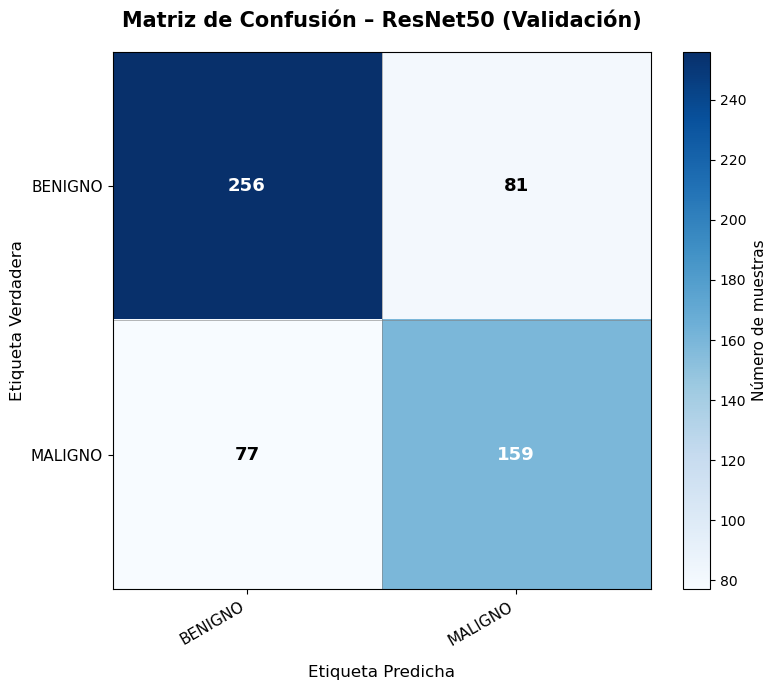

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# =========================
# Predicciones VALIDACIÓN
# =========================
y_pred_probs = model.predict(val_ds, verbose=1)
y_pred = np.argmax(y_pred_probs, axis=1)

# Clases reales desde el generator
y_true = val_ds.classes

# Mapeo de clases
target_names = [
    "BENIGNO",
    #"BENIGNO_SIN_CALLBACK",
    "MALIGNO"
]

print("Índices de clase:", val_ds.class_indices)

# =========================
# Reporte de clasificación
# =========================
print("\nReporte de Clasificación (Validación)\n")
print(
    classification_report(
        y_true,
        y_pred,
        target_names=target_names,
        digits=4,
        zero_division=0
    )
)

# =========================
# Matriz de confusión
# =========================
cm = confusion_matrix(y_true, y_pred)

fig, ax = plt.subplots(figsize=(9, 7))
im = ax.imshow(cm, cmap="Blues")

# Umbral dinámico para el color del texto
threshold = cm.max() / 2

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(
            j, i, cm[i, j],
            ha="center",
            va="center",
            fontsize=13,
            fontweight="bold",
            color="white" if cm[i, j] > threshold else "black"
        )

# =========================
# Etiquetas y ticks
# =========================
ax.set_xticks(np.arange(len(target_names)))
ax.set_yticks(np.arange(len(target_names)))

ax.set_xticklabels(
    target_names,
    fontsize=11,
    rotation=30,
    ha="right"
)

ax.set_yticklabels(
    target_names,
    fontsize=11
)

ax.set_xlabel("Etiqueta Predicha", fontsize=12, labelpad=12)
ax.set_ylabel("Etiqueta Verdadera", fontsize=12)
ax.set_title(
    "Matriz de Confusión – ResNet50 (Validación)",
    fontsize=15,
    fontweight="bold",
    pad=18
)

# =========================
# Grid fino
# =========================
ax.set_xticks(np.arange(-0.5, len(target_names), 1), minor=True)
ax.set_yticks(np.arange(-0.5, len(target_names), 1), minor=True)

ax.grid(
    which="minor",
    color="gray",
    linestyle="-",
    linewidth=0.4
)
ax.tick_params(which="minor", bottom=False, left=False)

# =========================
# Barra de color
# =========================
cbar = plt.colorbar(im, ax=ax, fraction=0.045, pad=0.04)
cbar.ax.tick_params(labelsize=10)
cbar.set_label("Número de muestras", fontsize=11)

plt.tight_layout()
plt.show()


In [ ]:
MODEL_SAVE_PATH = r"C:\Users\juanh\Desktop\carpeta_final_cancer_de_mama\PROYECTO_COPIA_IMAGENES_REDIMENCION_ANTES_SIN_USO_prueba_1024\MODELOS\RESNET50_512PX_CBISDDSM_FINETUNED.keras"

model.save(MODEL_SAVE_PATH)

print("Modelo guardado correctamente en:")
print(MODEL_SAVE_PATH)


Modelo guardado correctamente en:
C:\Users\juanh\Desktop\carpeta_final_cancer_de_mama\PROYECTO_COPIA_IMAGENES_REDIMENCION_ANTES_SIN_USO_prueba_1024\MODELOS\RESNET50_512PX_CBISDDSM_FINETUNED.keras


In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import numpy as np

# =========================
# Binarización One-vs-Rest
# =========================
y_true_bin = label_binarize(y_true, classes=[0, 1, 2])

# =========================
# Cálculo de AUC por clase
# =========================
print("\nMÉTRICAS ROC / AUC POR CLASE (One-vs-Rest)\n")

auc_scores = {}

for i, name in enumerate(target_names):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_probs[:, i])
    roc_auc = auc(fpr, tpr)
    auc_scores[name] = roc_auc

    print(f"Clase: {name}")
    print(f"  AUC: {roc_auc:.4f}")
    print("-" * 35)

# =========================
# AUC promedio
# =========================
macro_auc = np.mean(list(auc_scores.values()))
print(f"\nAUC promedio (macro): {macro_auc:.4f}")



MÉTRICAS ROC / AUC POR CLASE (One-vs-Rest)

Clase: BENIGNO
  AUC: 0.8082
-----------------------------------
Clase: MALIGNO
  AUC: 0.8082
-----------------------------------

AUC promedio (macro): 0.8082


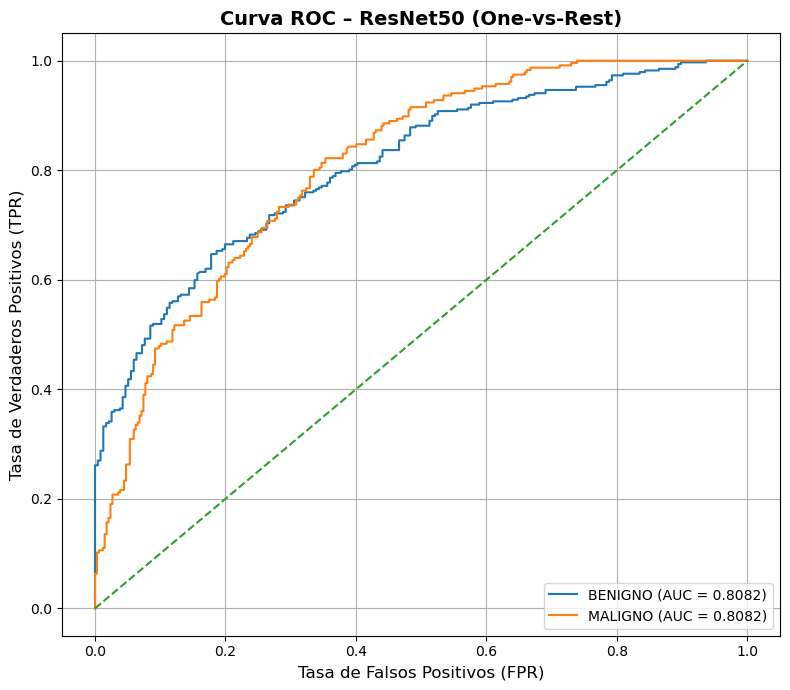

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# =========================
# Binarización One-vs-Rest
# =========================
y_true_bin = label_binarize(y_true, classes=[0, 1, 2])

plt.figure(figsize=(8, 7))

for i, name in enumerate(target_names):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(
        fpr,
        tpr,
        label=f"{name} (AUC = {roc_auc:.4f})"
    )

# Línea diagonal (clasificador aleatorio)
plt.plot([0, 1], [0, 1], linestyle="--")

# =========================
# Etiquetas en español
# =========================
plt.xlabel("Tasa de Falsos Positivos (FPR)", fontsize=12)
plt.ylabel("Tasa de Verdaderos Positivos (TPR)", fontsize=12)
plt.title("Curva ROC – ResNet50 (One-vs-Rest)", fontsize=14, fontweight="bold")

plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
MODEL_SAVE_PATH = r"C:\Users\juanh\Desktop\carpeta_final_cancer_de_mama\PROYECTO_COPIA_IMAGENES_REDIMENCION_ANTES_SIN_USO_prueba_1024\MODELOS\RESNET50_512PX_CBISDDSM_FINETUNED_ultimo_mejor_resnet50.keras"

model.save(MODEL_SAVE_PATH)

print("Modelo guardado correctamente en:")
print(MODEL_SAVE_PATH)


Modelo guardado correctamente en:
C:\Users\juanh\Desktop\carpeta_final_cancer_de_mama\PROYECTO_COPIA_IMAGENES_REDIMENCION_ANTES_SIN_USO_prueba_1024\MODELOS\RESNET50_512PX_CBISDDSM_FINETUNED_ultimo_mejor_resnet50.keras


# Evaluación del modelo ResNet-50 con Fine-Tuning

Con el propósito de analizar el desempeño del modelo **ResNet-50** en la clasificación de imágenes mamográficas, se presenta la evaluación correspondiente al esquema de **fine-tuning**, en el cual se ajustaron las capas profundas de la red para especializar el aprendizaje al dominio médico del estudio.

---

## Desempeño del modelo

El modelo fue entrenado y evaluado sobre el conjunto de validación, considerando dos clases: **BENIGNO** y **MALIGNO**. A continuación, se muestran las métricas obtenidas tras aplicar fine-tuning.

### Reporte de Clasificación (Validación)

| Clase     | Precision | Recall  | F1-score | Support |
|-----------|-----------|---------|----------|---------|
| BENIGNO   | 0.7688    | 0.7596  | 0.7642   | 337     |
| MALIGNO   | 0.6625    | 0.6737  | 0.6681   | 236     |
| **Accuracy global** |           |         | **0.7243** | 573 |
| **Macro avg** | 0.7156 | 0.7167 | 0.7161 | 573 |
| **Weighted avg** | 0.7250 | 0.7243 | 0.7246 | 573 |

---

## Análisis de resultados

El modelo **ResNet-50 con fine-tuning** alcanza un **accuracy global del 72.43 %**, reflejando una capacidad sólida para distinguir entre imágenes benignas y malignas. El **F1-score macro (0.7161)** indica un desempeño balanceado entre ambas clases, evitando un sesgo significativo hacia la clase mayoritaria.

Desde una perspectiva clínica, el **recall de la clase MALIGNO (67.37 %)** resulta particularmente relevante, ya que demuestra una adecuada capacidad del modelo para identificar casos positivos, reduciendo el riesgo de falsos negativos, los cuales son críticos en aplicaciones médicas.

Asimismo, la cercanía entre los promedios macro y ponderado sugiere que el modelo mantiene estabilidad en su aprendizaje y un comportamiento consistente frente al desbalance del conjunto de datos.

---

## Justificación del uso de Fine-Tuning

La elección del esquema de **fine-tuning en ResNet-50** se fundamenta en la necesidad de adaptar las representaciones jerárquicas profundas de la red a características específicas de las imágenes mamográficas, las cuales difieren de los patrones visuales generales utilizados durante el preentrenamiento.

Al permitir el ajuste de las capas profundas, el modelo logra refinar la extracción de rasgos relevantes como texturas, contrastes y estructuras asociadas a lesiones malignas, mejorando su capacidad de discriminación entre clases.

---

## Conclusión

En conclusión, el modelo **ResNet-50 con fine-tuning** presenta un desempeño robusto y equilibrado en la tarea de clasificación de imágenes mamográficas, destacando tanto en precisión global como en la detección de casos malignos. Estas características justifican su selección como una arquitectura adecuada para el sistema de clasificación propuesto en este estudio.


# Comparación General – Modelos de Clasificación de Mamografía (Imágenes 512 × 512 px)

La siguiente tabla resume el desempeño de los modelos evaluados en el problema de clasificación de imágenes mamográficas, considerando exclusivamente los esquemas **seleccionados con fine-tuning**, los cuales demostraron un comportamiento más estable y clínicamente relevante.

| Modelo        | Fine-Tuning | Accuracy  | F1-score Macro | Comentarios |
|--------------|------------|--------------|----------------|-------------|
| **Xception** | ✅ Sí | 0.5899 | 0.3788 | Accuracy moderado; alta dificultad para detectar la clase MALIGNO; fine-tuning mejora estabilidad pero persiste bajo recall maligno. |
| **VGGNet16** | ✅ Sí | 0.6771 | 0.6674 | Desempeño balanceado entre clases; mejora consistente en detección de MALIGNO; modelo estable tras ajuste fino. |
| **ResNet50** | ✅ Sí | **0.7243** | **0.7161** | Mejor desempeño global; equilibrio entre precisión y recall; alta capacidad de discriminación clínica. |

---

## 🔹 Interpretación General

1. **Impacto del fine-tuning**  
   El fine-tuning fue determinante para los tres modelos, permitiendo adaptar las representaciones profundas a patrones específicos de imágenes mamográficas, lo que se reflejó en mejoras de estabilidad, F1-score y capacidad de discriminación entre clases.

2. **Comportamiento por modelo**  
   - **Xception** mostró una mejora limitada tras el fine-tuning, manteniendo dificultades para identificar correctamente la clase **MALIGNO**, lo que restringe su aplicabilidad clínica directa.  
   - **VGGNet16** alcanzó un desempeño equilibrado, con métricas consistentes entre clases y una mejora clara en la detección de casos malignos.  
   - **ResNet50** presentó el mejor comportamiento general, destacando por su accuracy superior y un F1-score macro elevado, lo que indica un aprendizaje robusto y balanceado.

3. **Relevancia clínica**  
   Más allá del accuracy global, los modelos seleccionados con fine-tuning priorizan una mejor detección de la clase **MALIGNO**, aspecto crítico en escenarios médicos donde minimizar falsos negativos es fundamental.

---

## 🔹 Conclusión Final

Los resultados confirman que el **fine-tuning es un paso indispensable** para la correcta aplicación de redes neuronales convolucionales preentrenadas en tareas de clasificación médica.  

Entre los modelos evaluados:

- **ResNet50 con fine-tuning** se posiciona como la arquitectura con **mejor desempeño global y mayor equilibrio entre clases**, siendo la opción más sólida para el sistema propuesto.  
- **VGGNet16 con fine-tuning** representa una alternativa estable y confiable, especialmente cuando se busca consistencia en la detección de casos malignos.  
- **Xception**, aunque beneficiado por el ajuste fino, muestra limitaciones en la discriminación clínica, lo que reduce su prioridad frente a las otras arquitecturas.

En conjunto, los resultados evidencian que la **capacidad de discriminación clínica y el balance entre métricas** es más relevante que maximizar únicamente el accuracy, alineándose con los objetivos del diagnóstico asistido por computadora.
